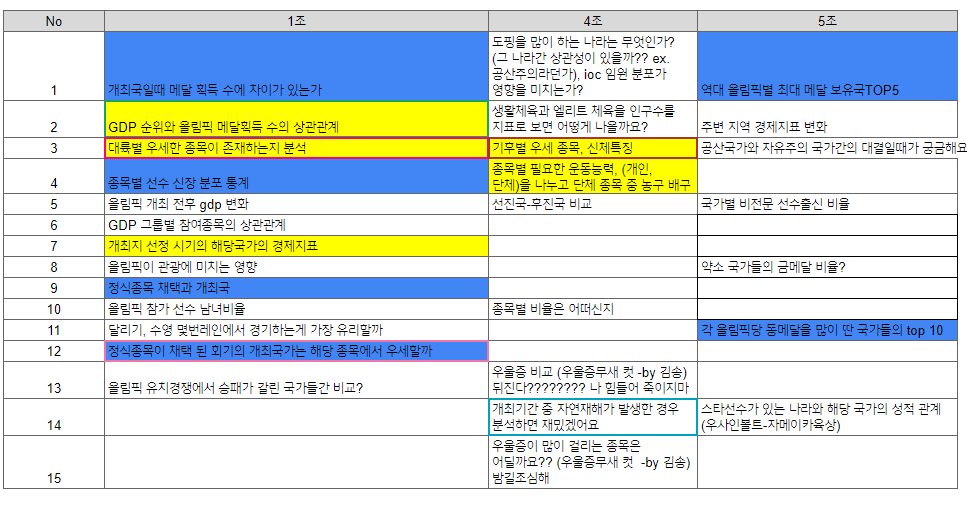

=====================================================================
# **Faster, Higher, Stronger! - Together**

=====================================================================

# 빅데이터 분석 1조 / 주현우, 송준영, 김경일, 손상우, 이지현, 김  송


## - 1. 분석 주제 : 올림픽 분석 (Olympic Analysis) 
## - 2. 분석항목 선정



    - 소주제 선정 (목 차)
        1. 평창올림픽을 개최할 때 우리나라는 어느 정도의 성적을 내었을까?
        2. 개최국일때 메달 획득 수에 차이가 있는가?
        3. GDP 순위와 올림픽 메달획득 수의 상관관계
        4. 대륙별 우세한 종목이 존재하는지 분석
        5. 흥미롭게 볼만한 팩트 체크 (- 문서 5. 종목별 선수 신장 분포 통계)
        6. 여성들의 올림픽 출전(+)
        7. 역대 올림픽 종목별 참여한 선수 count (+)
        8. 8. 올림픽 출전 선수들의 최소, 최대, 평균 신장(종목별) 및 체중 (대륙별) (- 문서 5. 종목별 선수 신장 분포 통계)
        9. 연도별 정식 스포츠 종목 및 사라진 종목들
       10. 역대 올림픽 기간 (+)
       11. 종목별 선수 신장 분포 통계
       12. GDP 그룹별 참여종목의 상관관계
       13. 개최지 선정 시기의 해당국가의 경제지표
       14. 정식종목 채택과 개최국
       15. 역대 올림픽별 최대 메달 보유국 TOP 5
       16. 각 올림픽당 동메달을 많이 딴 국가들의 top 10
 

    







## 3. 사용한 데이터 셋
 - athlete_events.csv
 - continents.csv
 - tourist.csv
 - pyeongchang 2018 dataset.csv
 - noc_regions.csv
 - population_by_country_2020.csv
 - olympic_hosts.csv

 : from kaggle
 
 
  __총 7개 Dataset 사용__

## __1. 평창올림픽을 개최할 때 우리나라는 어느 정도의 성적을 내었을까?__

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as pylab


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import folium
from folium import plugins
# import geopandas as gpd
import branca

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import ttest_ind

plt.rcParams["font.family"] = "monospace"
plt.rcParams['figure.dpi'] = 150
background_color='#F5F4EF'

# Print colored text 
# https://stackoverflow.com/questions/287871/how-to-print-colored-text-to-the-terminal
# Includes other color options

HEADER = '\033[95m'
OKBLUE = '\033[94m'
OKCYAN = '\033[96m'
OKGREEN = '\033[92m'
WARNING = '\033[93m'
FAIL = '\033[91m'
ENDC = '\033[0m'
BOLD = '\033[1m'
UNDERLINE = '\033[4m'

class color_font:
    S = BOLD + OKBLUE +  UNDERLINE   #S = Start
    E = ENDC #E = End
    
print(color_font.S+"Datasets & Libraries loaded"+color_font.E)

Datasets & Libraries loaded


In [7]:
population = pd.read_csv('./population_by_country_2020.csv')
regions = pd.read_csv('./noc_regions.csv')

df = pd.read_csv('./athlete_events.csv')
df_21 = pd.read_csv('./Tokyo 2021 dataset.csv')
df_21_full = pd.read_csv('./Tokyo 2021 dataset.csv')
df_18 =pd.read_csv('./pyengchang 2018 dataset.csv')
df_18_full =pd.read_csv('./pyengchang 2018 dataset.csv')


# For geographic plotting
# url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
# country_shapes = f'{url}/world-countries.json'

findfont: Font family ['sansserif'] not found. Falling back to DejaVu Sans.


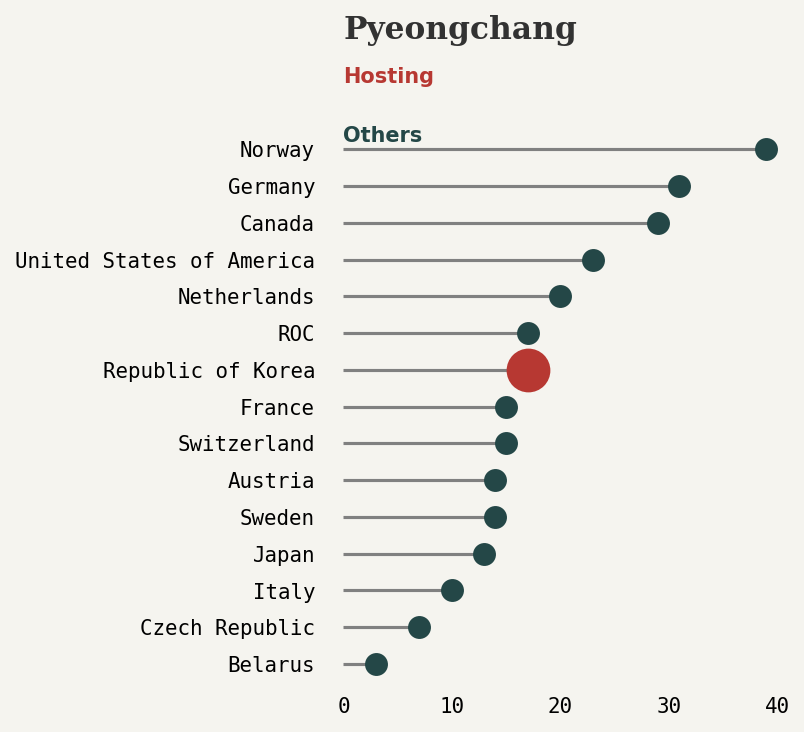

In [9]:

fig, ax = plt.subplots(figsize=(4, 5), facecolor=background_color)

temp = df_18_full[:15].sort_values(by='Total')
my_range=range(1,len(df_18_full[:15]['Team/NOC'])+1)

# temp = df_21_full[:15].sort_values(by='Total')
# my_range=range(1,len(df_21_full[:15]['Team/NOC'])+1)


ax.set_facecolor(background_color)

#B73832



plt.hlines(y=my_range, xmin=0, xmax=temp['Total'], color='gray')
plt.plot(temp['Total'], my_range, "o",markersize=10, color='#244747')
plt.plot(temp['Total'][6], my_range[8], "o",markersize=20,color='#B73832')


Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("Total Medals",fontfamily='monospace',loc='left',color='gray')
ax.set_axisbelow(True)


for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
    


ax.text(0,Yend+2.3, 'Pyeongchang', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(0,Yend+1.1, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#B73832')
ax.text(0,Yend-0.5, 'Others', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#244747')



# Add titles and axis names
plt.yticks(my_range, temp['Team/NOC'])
plt.xlabel('')


ax.annotate(temp['Total'][2], xy=(54.86,10.95), va = 'center', ha='left',fontweight='light', fontfamily='monospace',fontsize=10, color='white',rotation=0)

# Show the plot
plt.show()

In [10]:
def highlight(nation):
    if nation['Team/NOC'] == 'Republic of Korea':
        return ['background-color: #f3f2f1']*6
    else:
        return ['background-color: white']*6

df_18_full[['Rank','Team/NOC','Bronze Medal','Silver Medal','Gold Medal','Total']].iloc[:15].style.set_caption('Medals by Country: Summer Olympic Games sorted by Gold Medals [Top 15]')\
.bar(subset=['Gold Medal'], color='#f0c05a')\
.bar(subset=['Silver Medal'], color='Lightgray')\
.bar(subset=['Bronze Medal'], color='#a97142')\
.hide_index().apply(highlight, axis=1)

Rank,Team/NOC,Bronze Medal,Silver Medal,Gold Medal,Total
1,Norway,11,14,14,39
2,Germany,7,10,14,31
3,Canada,10,8,11,29
4,United States of America,6,8,9,23
5,Netherlands,6,6,8,20
6,Sweden,1,6,7,14
7,Republic of Korea,4,8,5,17
8,Switzerland,4,6,5,15
9,France,6,4,5,15
10,Austria,6,3,5,14


In [11]:
# Tabular
df = pd.merge(df,regions,left_on='NOC',right_on='NOC')
df = df.query('Season == "Summer"') # Only interested in Summer Olympics for this project

#Replacing the country name with common values
df.replace('USA', "United States of America", inplace = True)
df.replace('Tanzania', "United Republic of Tanzania", inplace = True)
df.replace('Democratic Republic of Congo', "Democratic Republic of the Congo", inplace = True)
df.replace('Congo', "Republic of the Congo", inplace = True)
df.replace('Lao', "Laos", inplace = True)
df.replace('Syrian Arab Republic', "Syria", inplace = True)
df.replace('Serbia', "Republic of Serbia", inplace = True)
df.replace('Czechia', "Czech Republic", inplace = True)
df.replace('UAE', "United Arab Emirates", inplace = True)
df.replace('UK', "United Kingdom", inplace = True)

population.replace('United States', "United States of America", inplace = True)
population.replace('Czech Republic (Czechia)', "Czech Republic", inplace = True)
population.replace('DR Congo', "Democratic Republic of the Congo", inplace = True)
population.replace('Serbia', "Republic of Serbia", inplace = True)
population.replace('Tanzania', "United Republic of Tanzania", inplace = True)

df_21_full.replace('Great Britain', "United Kingdom", inplace = True)
df_21_full.replace("People's Republic of China", "China", inplace = True)
df_21_full.replace("ROC", "Russia", inplace = True)


In [12]:
# Function to map country to city

def host_country(col):
    if col == "Rio de Janeiro":
        return "Brazil"
    elif col == "London":
        return "United Kingdom"
    elif col == "Beijing":
        return  "China"
    elif col == "Athina":
        return  "Greece"
    elif col == "Sydney" or col == "Melbourne":
        return  "Australia"
    elif col == "Atlanta" or col == "Los Angeles" or col == "St. Louis":
        return  "United States of America"
    elif col == "Barcelona":
        return  "Spain"
    elif col == "Seoul":
        return  "South Korea"
    elif col == "Moskva":
        return  "Russia"
    elif col == "Montreal":
        return  "Canada"
    elif col == "Munich" or col == "Berlin":
        return  "Germany"
    elif col == "Mexico City":
        return  "Mexico"
    elif col == "Tokyo":
        return  "Japan"
    elif col == "Roma":
        return  "Italy"
    elif col == "Paris":
        return  "France"
    elif col == "Helsinki":
        return  "Finland"
    elif col == "Amsterdam":
        return  "Netherlands"
    elif col == "Antwerpen":
        return  "Belgium"
    elif col == "Stockholm":
        return  "Sweden"
    else:
        return "Other"


# Applying this function

df['Host_Country'] = df['City'].apply(host_country)

In [13]:
df_new = df.groupby(['Year','Host_Country','region_y','Medal'])['Medal'].count().unstack().fillna(0).astype(int).reset_index()

df_new['Is_Host'] = np.where(df_new['Host_Country'] == df_new['region_y'],1,0)
df_new['Total Medals'] = df_new['Bronze'] + df_new['Silver'] + df_new['Gold']

In [30]:
# Preparing to add 2021 data to our historic df

df_21_full_refined = df_21_full[['Team/NOC', "Gold Medal", "Silver Medal", "Bronze Medal"]]
df_21_full_refined['Total Medals'] = df_21_full_refined[["Gold Medal", "Silver Medal", "Bronze Medal"]].sum(axis=1)
df_21_full_refined['Year'] = 2021

df_21_full_refined = df_21_full_refined.rename(columns={'Gold Medal':'Gold', 'Silver Medal':'Silver','Bronze Medal':'Bronze'})

df_21_full_refined['Is_Host'] = np.where(df_21_full_refined['Team/NOC'] == 'Japan',1,0)
df_21_full_refined['Host_Country'] = 'Japan'
df_21_full_refined = df_21_full_refined.rename(columns={'Team/NOC':'region'})

# Adding 2021 data to historic
df_new = df_new.append(df_21_full_refined)

# Removing Russia as many Olympic games were competed in as the Soviet Union, containing several modern day nations

df_new = df_new.query("region != 'Russia' | region != 'ROC'")

## **2. 개최국일때 메달 획득 수에 차이가 있는가?**


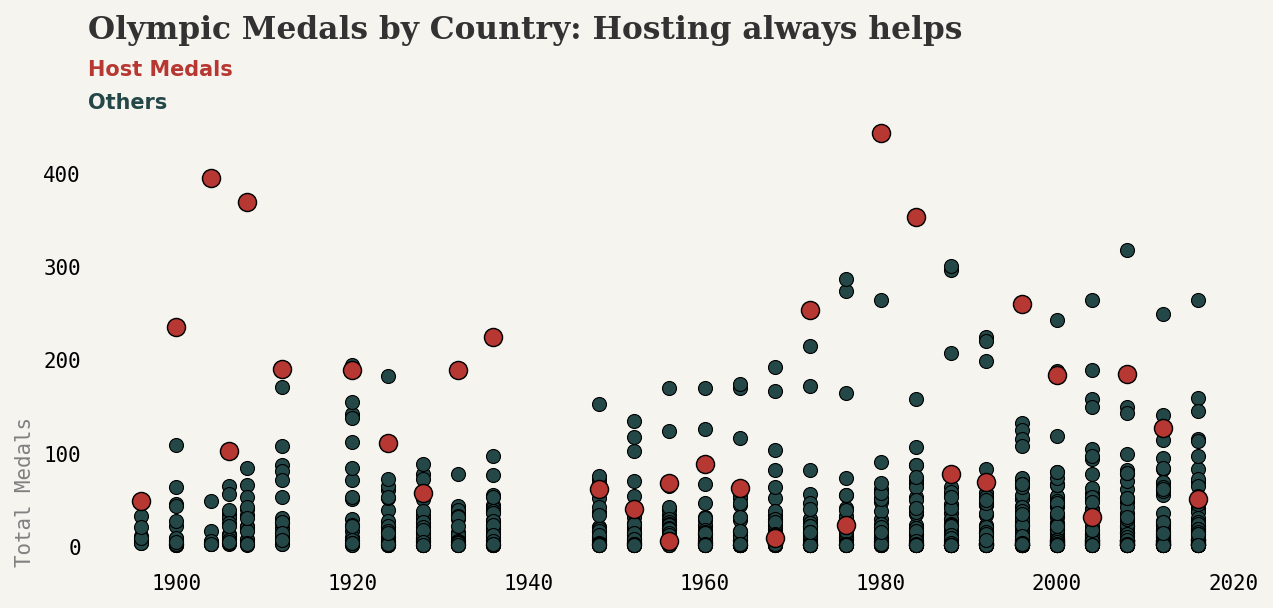

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10,4), facecolor=background_color)

sns.scatterplot(data=df_new.query("Is_Host == 0"), x='Year', y='Total Medals', s=45, ec='black', color='#244747',ax=ax)
sns.scatterplot(data=df_new.query("Is_Host == 1"), x='Year', y='Total Medals', s=75, ec='black', color='#B73832',ax=ax)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel("Total Medals",fontfamily='monospace',loc='bottom',color='gray')
ax.set_xlabel("")

ax.set_facecolor(background_color)
ax.set_axisbelow(True)


for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
    

ax.text(Xstart,Yend+80, 'Olympic Medals by Country: Hosting always helps', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart,Yend+40, 'Host Medals', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#B73832')
ax.text(Xstart,Yend+5, 'Others', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#244747')

plt.show()


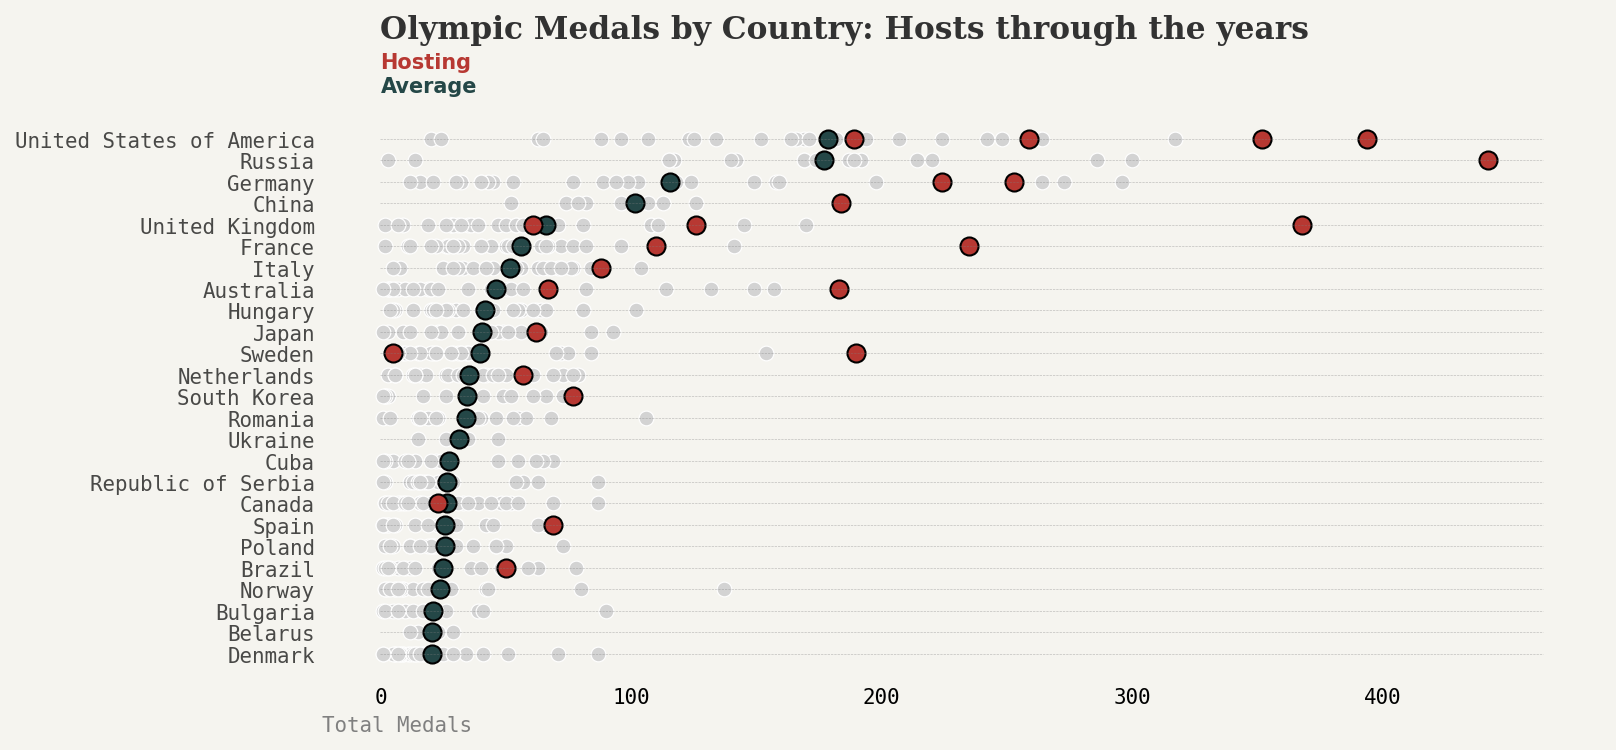

In [16]:
fig, ax = plt.subplots(1,1, figsize=(11, 5), facecolor=background_color)

# top 20
top_list_ = df_new.groupby('region_y')['Total Medals'].mean().sort_values(ascending=False).reset_index()[:25].sort_values(by='Total Medals',ascending=True)

plot = 1
for country in top_list_['region_y']:
    mean = df_new[df_new['region_y'] == country].groupby('region_y')['Total Medals'].mean()
    # historic scores
    sns.scatterplot(data=df_new[df_new['region_y'] == country], y=plot, x='Total Medals',color='lightgray',s=50,ax=ax)
    # mean score
    sns.scatterplot(data=df_new[df_new['region_y'] == country], y=plot, x=mean,color='#244747',ec='black',linewidth=1,s=75,ax=ax)
    # Hosting score
    sns.scatterplot(data=(df_new[(df_new['region_y'] == country) & (df_new['Is_Host'] == 1)]), y=plot, x='Total Medals',color='#B73832',ec='black',linewidth=1,s=75,ax=ax)   
    plot += 1

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.set_yticks(top_list_.index+1)
ax.set_yticklabels(top_list_['region_y'][::-1], fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("Total Medals",fontfamily='monospace',loc='left',color='gray')
ax.set_facecolor(background_color)
ax.hlines(y=top_list_.index+1, xmin=0, xmax=Xend, color='gray', alpha=0.5, linewidth=.3, linestyles='--')
ax.set_axisbelow(True)


for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
    


ax.text(0,Yend+3.5, 'Olympic Medals by Country: Hosts through the years', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(0,Yend+2.1, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#B73832')
ax.text(0,Yend+1, 'Average', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#244747')


plt.show()

In [20]:
sample = df_new.groupby(['region_y','Is_Host'])['Gold'].mean().unstack().dropna()
sample = sample.rename(columns={0 : "Not Hosting", 1 : "Hosting"})
sample = sample.reset_index().query("region_y == 'Japan' | region_y == 'Brazil' | region_y == 'United Kingdom' | region_y == 'China' | region_y == 'Greece' | region_y == 'China' ").set_index('region_y')

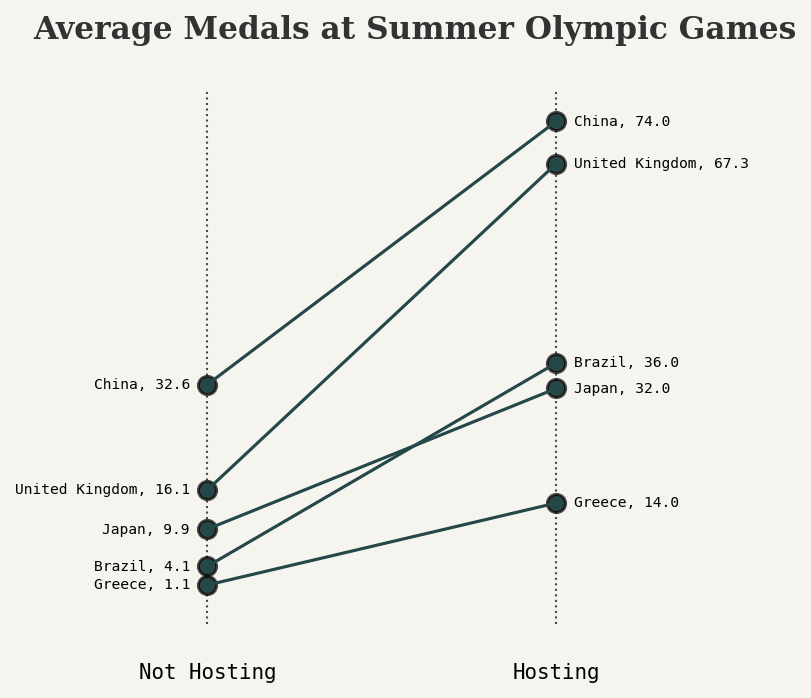

In [21]:
import matplotlib.lines as mlines

low_c = '#B73832'
high_c = '#244747'

left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(sample.index, sample['Not Hosting'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(sample.index, sample['Hosting'])]
klass = [low_c if (y1-y2) < 0 else high_c for y1, y2 in zip(sample['Not Hosting'], sample['Hosting'])]

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=low_c if p1[1]-p2[1] > 0 else high_c, marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(6,5), dpi= 150, facecolor=background_color)

ax.set_facecolor(background_color)
ax.vlines(x=1, ymin=-5, ymax=100, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=-5, ymax=100, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=sample['Not Hosting'], x=np.repeat(1, sample.shape[0]), s=75,linewidth=1.5, color='black', alpha=0.7)
ax.scatter(y=sample['Hosting'], x=np.repeat(3, sample.shape[0]), s=75, linewidth=1.5,color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, c in zip(sample['Not Hosting'], sample['Hosting'], sample.index):
    newline([1,p1], [3,p2])
    ax.text(1-0.1, p1, c + ', ' + str(round(p1,1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':7})
    ax.text(3+0.1, p2, c + ', ' + str(round(p2,1)), horizontalalignment='left', verticalalignment='center', fontdict={'size':7})


ax.text(0,87,"Average Medals at Summer Olympic Games", fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')

ax.set(xlim=(0,4), ylim=(-10,sample.max().max()+5), ylabel='') #ylim=(), 
ax.set_xticks([1,3])
ax.set_xticklabels(["Not Hosting", "Hosting"],fontsize=10)
#ax.xaxis.tick_top()

for s in ["top","right","left","bottom"]:
    ax.spines[s].set_visible(False)
    
ax.tick_params(axis='both',which='both',length=0,labelleft=False) 
plt.rcParams["font.family"] = "monospace"

plt.show()

## 3. GDP 순위와 올림픽 메달획득 수의 상관관계

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as pylab


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import folium
from folium import plugins
# import geopandas as gpd
import branca

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import ttest_ind

plt.rcParams["font.family"] = "monospace"
plt.rcParams['figure.dpi'] = 150
background_color='#F5F4EF'

# Print colored text 
# https://stackoverflow.com/questions/287871/how-to-print-colored-text-to-the-terminal
# Includes other color options

HEADER = '\033[95m'
OKBLUE = '\033[94m'
OKCYAN = '\033[96m'
OKGREEN = '\033[92m'
WARNING = '\033[93m'
FAIL = '\033[91m'
ENDC = '\033[0m'
BOLD = '\033[1m'
UNDERLINE = '\033[4m'

class color_font:
    S = BOLD + OKBLUE +  UNDERLINE   #S = Start
    E = ENDC #E = End
    
print(color_font.S+"Datasets & Libraries loaded"+color_font.E)

Datasets & Libraries loaded


In [29]:
df_new = df.groupby(['Year','Host_Country','region_y','Medal'])['Medal'].count().unstack().fillna(0).astype(int).reset_index()



In [30]:
df_new['Is_Host'] = np.where(df_new['Host_Country'] == df_new['region_y'],1,0)
df_new['Total Medals'] = df_new['Bronze'] + df_new['Silver'] + df_new['Gold']

In [31]:
medals = df.groupby(['region_y','Medal'])['Medal'].count().unstack().fillna(0).astype(int)

medals['Total'] = medals['Bronze'] + medals['Silver'] + medals['Gold']

medals = medals[['Bronze','Silver','Gold','Total']].sort_values(by='Total', ascending=False)


medals.iloc[:].style.set_caption('Medals by Country: Summer Olympic Games ')\
.bar(subset=['Gold'], color='#f0c05a')\
.bar(subset=['Silver'], color='Lightgray')\
.bar(subset=['Bronze'], color='#a97142')\
#.background_gradient(subset=['Total'], cmap='BuGn')

Medal,Bronze,Silver,Gold,Total
region_y,,,,
United States of America,1197,1333,2472,5002
Russia,994,974,1220,3188
Germany,1064,987,1075,3126
United Kingdom,620,729,636,1985
France,587,575,465,1627
Italy,454,474,518,1446
Australia,515,456,362,1333
Hungary,363,328,432,1123
Sweden,358,396,354,1108


In [33]:
nations = list(medals.index)
remove_set ={'Trinidad', 'Montenegro', 'Individual Olympic Athletes', 'Ivory Coast', 'Kosovo', 'Curacao'}
nations= [i for i in nations if i not in remove_set]

In [34]:
gdp =gdp.set_index("Country").loc[nations]



In [35]:
gdp['Total'] = medals["Total"]
gdp

,Code,Population,GDP per Capita,Total
Country,,,,
United States of America,USA,321418820.0,56115.718430,5002
Russia,RUS,144096812.0,9092.580536,3188
Germany,GER,81413145.0,41313.313990,3126
United Kingdom,GBR,65138232.0,43875.969610,1985
France,FRA,66808385.0,36205.568100,1627
...,...,...,...,...
Cyprus,CYP,1165300.0,23242.840070,1
Gabon,GAB,1725292.0,8266.445605,1
Djibouti,DJI,887861.0,1945.124293,1


In [36]:
gdp["GDP"] = (gdp['Population'] * gdp['GDP per Capita'])


In [37]:
gdp["GDP"] = (gdp['Population'] * gdp['GDP per Capita'])
gdp['Medal per Capita'] = gdp['Total']/gdp["Population"] * 10000000


In [38]:
new_gdp = gdp[(gdp["Total"] > 100) &(gdp['Total'] < 2000)]

In [39]:
new_gdp = new_gdp.dropna(axis=0)

In [40]:
medal = new_gdp["Medal per Capita"]
gnp = new_gdp["GDP per Capita"]


In [41]:
z = np.polyfit(medal, gnp, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화

y=32.039358x+(14051.433130)


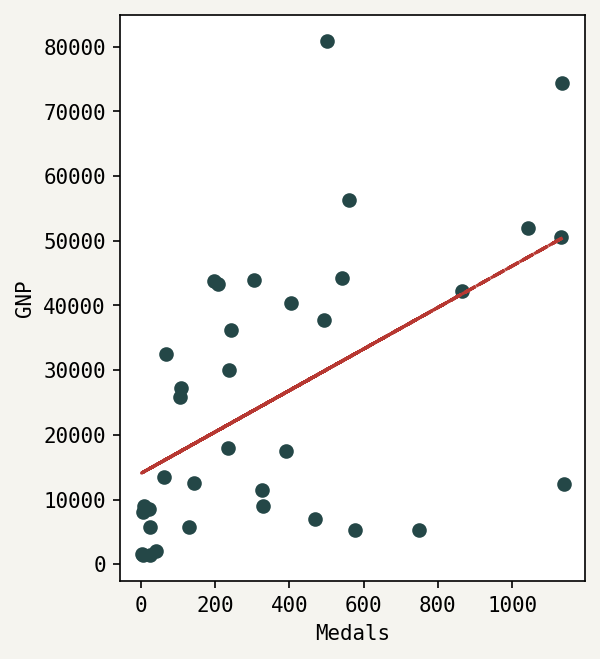

In [49]:

# 그래프 그리기
fig, ax = plt.subplots(figsize=(4, 5), facecolor=background_color)
plt.scatter(medal,gnp,color = "#244747")
plt.plot(medal,p(medal),"--", color ='#B73832')
plt.xlabel("Medals")
plt.ylabel("GNP")

# pylab.plot(medal,gnp,'o',color = "#244747") #산점도를 뜻할 때 'o'라고 합니다.
# pylab.plot(medal,p(medal),"--", color ='#B73832' )


# 방정식 계산
print( "y=%.6fx+(%.6f)"%(z[0],z[1]))

# 4. 대륙별 우세한 종목이 존재하는지 분석

In [2]:
df = pd.read_csv('./olympic/athlete_events.csv')

In [3]:
df2 = pd.read_csv('./olympic/continents.csv')

In [4]:
df2

,name,alpha-3,region
0,Afghanistan,AFG,Asia
1,?land Islands,ALA,Europe
2,Albania,ALB,Europe
3,Algeria,DZA,Africa
4,American Samoa,ASM,Oceania
...,...,...,...
244,Wallis and Futuna,WLF,Oceania
245,Western Sahara,ESH,Africa
246,Yemen,YEM,Asia
247,Zambia,ZMB,Africa


In [8]:
#region에 결측값 제거하기
df['region']=df['region'].fillna('None')
df.loc[df["NOC"] == "POL", "region"] = "Europe"

In [10]:
#csv파일 두개 합치기 
df1 =  df.merge(df2, left_on='NOC', right_on='alpha-3')
df1

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region_x,name,alpha-3,region_y
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,None,China,CHN,Asia
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,None,China,CHN,Asia
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,None,China,CHN,Asia
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,None,China,CHN,Asia
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,None,China,CHN,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196626,120422,Etimoni Timuani,M,24.0,184.0,72.0,Tuvalu,TUV,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 100 metres,NaN,None,Tuvalu,TUV,Oceania
196627,120439,Okilani Tinilau,M,19.0,NaN,NaN,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 100 metres,NaN,None,Tuvalu,TUV,Oceania
196628,46491,Margret Hassan,F,18.0,160.0,55.0,South Sudan,SSD,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 200 metres,NaN,None,South Sudan,SSD,Africa
196629,58765,Santino Kenyi,M,22.0,180.0,75.0,South Sudan,SSD,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN,None,South Sudan,SSD,Africa


In [11]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,None
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Europe
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Europe
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Europe
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Europe


In [12]:
#메달없는 사람 제거
new_df = df1.dropna(axis =0)
new_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region_x,name,alpha-3,region_y
8,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,Silver,None,China,CHN,Asia
10,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres R...",Bronze,None,China,CHN,Asia
11,3610,An Yulong,M,23.0,173.0,70.0,China,CHN,2002 Winter,2002,Winter,Salt Lake City,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres R...",Bronze,None,China,CHN,Asia
12,3611,An Zhongxin,F,23.0,170.0,65.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Softball,Softball Women's Softball,Silver,None,China,CHN,Asia
17,6381,Ba Yan,F,21.0,183.0,78.0,China,CHN,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Women's Basketball,Bronze,None,China,CHN,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196285,98198,Ana Radovi,F,25.0,175.0,65.0,Montenegro,MNE,2012 Summer,2012,Summer,London,Handball,Handball Women's Handball,Silver,None,Montenegro,MNE,Europe
196291,106233,Maja Savi,F,36.0,176.0,66.0,Montenegro,MNE,2012 Summer,2012,Summer,London,Handball,Handball Women's Handball,Silver,None,Montenegro,MNE,Europe
196301,127705,Marina Vukevi-Raji,F,18.0,175.0,70.0,Montenegro,MNE,2012 Summer,2012,Summer,London,Handball,Handball Women's Handball,Silver,None,Montenegro,MNE,Europe
196501,86592,Vnuste Niyongabo,M,22.0,176.0,60.0,Burundi,BDI,1996 Summer,1996,Summer,Atlanta,Athletics,"Athletics Men's 5,000 metres",Gold,None,Burundi,BDI,Africa


In [13]:
new_df['Medal'].value_counts()

Bronze    7192
Gold      7099
Silver    6913
Name: Medal, dtype: int64

In [14]:
#메달이 없는 결측값 제거
region_medal = new_df.dropna(subset = ['Medal']).reset_index(drop = True) 
region_medal.drop_duplicates(inplace = True)

In [15]:
#대륙별 종목별 메달수 
sport_region_medal = new_df.groupby(['region_y','Sport'])['Medal'].agg(**{
'medal_count':'count'
}).reset_index() 

sport_region_medal

,region_y,Sport,medal_count
0,Africa,Athletics,188
1,Africa,Boxing,23
2,Africa,Fencing,2
3,Africa,Football,17
4,Africa,Judo,2
...,...,...,...
178,Oceania,Trampolining,1
179,Oceania,Triathlon,8
180,Oceania,Water Polo,39
181,Oceania,Weightlifting,3


In [16]:
#아프리카만 따로 뗀 df
df_africa = sport_region_medal.loc[0:8]

df_africa

,region_y,Sport,medal_count
0,Africa,Athletics,188
1,Africa,Boxing,23
2,Africa,Fencing,2
3,Africa,Football,17
4,Africa,Judo,2
5,Africa,Swimming,3
6,Africa,Taekwondo,6
7,Africa,Weightlifting,2
8,Africa,Wrestling,3


In [17]:
#아메리카만 뗀 df
df_americas = sport_region_medal.loc[9:57]

df_americas

,region_y,Sport,medal_count
9,Americas,Alpine Skiing,50
10,Americas,Archery,30
11,Americas,Athletics,1385
12,Americas,Baseball,179
13,Americas,Basketball,424
14,Americas,Beach Volleyball,44
15,Americas,Biathlon,3
16,Americas,Bobsleigh,43
17,Americas,Boxing,195
18,Americas,Canoeing,46


In [18]:
df_asia = sport_region_medal.loc[58:100]

df_asia

,region_y,Sport,medal_count
58,Asia,Alpine Skiing,1
59,Asia,Archery,87
60,Asia,Athletics,77
61,Asia,Badminton,96
62,Asia,Baseball,110
63,Asia,Basketball,34
64,Asia,Beach Volleyball,4
65,Asia,Biathlon,1
66,Asia,Boxing,108
67,Asia,Canoeing,8


In [19]:
df_europe = sport_region_medal.loc[101:152]

df_europe

,region_y,Sport,medal_count
101,Europe,Alpine Skiing,203
102,Europe,Archery,54
103,Europe,Art Competitions,2
104,Europe,Athletics,1020
105,Europe,Badminton,8
106,Europe,Basketball,209
107,Europe,Beach Volleyball,4
108,Europe,Biathlon,230
109,Europe,Bobsleigh,65
110,Europe,Boxing,224


In [20]:
df_oceania = sport_region_medal.loc[153:182]

df_oceania

,region_y,Sport,medal_count
153,Oceania,Alpine Skiing,2
154,Oceania,Archery,5
155,Oceania,Athletics,98
156,Oceania,Baseball,24
157,Oceania,Basketball,60
158,Oceania,Beach Volleyball,4
159,Oceania,Boxing,6
160,Oceania,Canoeing,58
161,Oceania,Cycling,94
162,Oceania,Diving,19


In [21]:
#메달갯수를 내림차순으로 정렬
df_africa = df_africa.sort_values('medal_count', ascending = False)
df_americas = df_americas.sort_values('medal_count', ascending = False)
df_asia = df_asia.sort_values('medal_count', ascending = False)
df_europe = df_europe.sort_values('medal_count', ascending = False)
df_oceania = df_oceania.sort_values('medal_count', ascending = False)

df_americas

,region_y,Sport,medal_count
11,Americas,Athletics,1385
48,Americas,Swimming,1034
31,Americas,Ice Hockey,517
13,Americas,Basketball,424
38,Americas,Rowing,408
26,Americas,Football,320
54,Americas,Volleyball,313
17,Americas,Boxing,195
12,Americas,Baseball,179
41,Americas,Sailing,164


In [22]:
#아프리카 상위 2개 하위2개 종목만 보여주기
df_africa_head = df_africa.head(2)  
df_africa_tail = df_africa.tail(2)

africa_concat = pd.concat([df_africa_head, df_africa_tail], sort = False)
africa_concat

,region_y,Sport,medal_count
0,Africa,Athletics,188
1,Africa,Boxing,23
4,Africa,Judo,2
7,Africa,Weightlifting,2


In [23]:
#아메라카 상위 2개 하위2개 종목만 보여주기
df_americas_head = df_americas.head(2)  
df_americas_tail = df_americas.tail(2)

americas_concat = pd.concat([df_americas_head, df_americas_tail], sort = False)
americas_concat

,region_y,Sport,medal_count
11,Americas,Athletics,1385
48,Americas,Swimming,1034
28,Americas,Golf,1
37,Americas,Rhythmic Gymnastics,1


In [24]:
#아시아 상위 2개 하위2개 종목만 보여주기
df_asia_head = df_asia.head(2)  
df_asia_tail = df_asia.tail(2)

asia_concat = pd.concat([df_asia_head, df_asia_tail], sort = False)
asia_concat

,region_y,Sport,medal_count
77,Asia,Gymnastics,280
100,Asia,Wrestling,241
65,Asia,Biathlon,1
58,Asia,Alpine Skiing,1


In [25]:
#유럽 상위 2개 하위2개 종목만 보여주기
df_europe_head = df_europe.head(2)  
df_europe_tail = df_europe.tail(2)

europe_concat = pd.concat([df_europe_head, df_europe_tail], sort = False)
europe_concat

,region_y,Sport,medal_count
104,Europe,Athletics,1020
117,Europe,Fencing,742
103,Europe,Art Competitions,2
121,Europe,Golf,1


In [68]:
df_europe[30:]

,region_y,Sport,medal_count
142,Europe,Synchronized Swimming,75
145,Europe,Tennis,67
109,Europe,Bobsleigh,65
115,Europe,Diving,58
127,Europe,Luge,55
102,Europe,Archery,54
113,Europe,Curling,47
120,Europe,Freestyle Skiing,38
139,Europe,Snowboarding,33
144,Europe,Taekwondo,30


In [61]:
#오세아니아 상위 2개 하위2개 종목만 보여주기
df_oceania_head = df_oceania.head(2)  
df_oceania_tail = df_oceania.tail(2)

oceania_concat = pd.concat([df_oceania_head, df_oceania_tail], sort = False)
oceania_concat



,region_y,Sport,medal_count
172,Oceania,Short Track Speed Skating,4
158,Oceania,Beach Volleyball,4
181,Oceania,Weightlifting,3
153,Oceania,Alpine Skiing,2
176,Oceania,Taekwondo,2
173,Oceania,Snowboarding,2
166,Oceania,Judo,2
178,Oceania,Trampolining,1
167,Oceania,Modern Pentathlon,1
182,Oceania,Wrestling,1


In [66]:
df_oceania.iloc[5:18]

,region_y,Sport,medal_count
170,Oceania,Sailing,81
174,Oceania,Softball,60
157,Oceania,Basketball,60
160,Oceania,Canoeing,58
163,Oceania,Equestrianism,56
180,Oceania,Water Polo,39
156,Oceania,Baseball,24
169,Oceania,Rugby Sevens,24
162,Oceania,Diving,19
171,Oceania,Shooting,13


NameError: name 'area2' is not defined

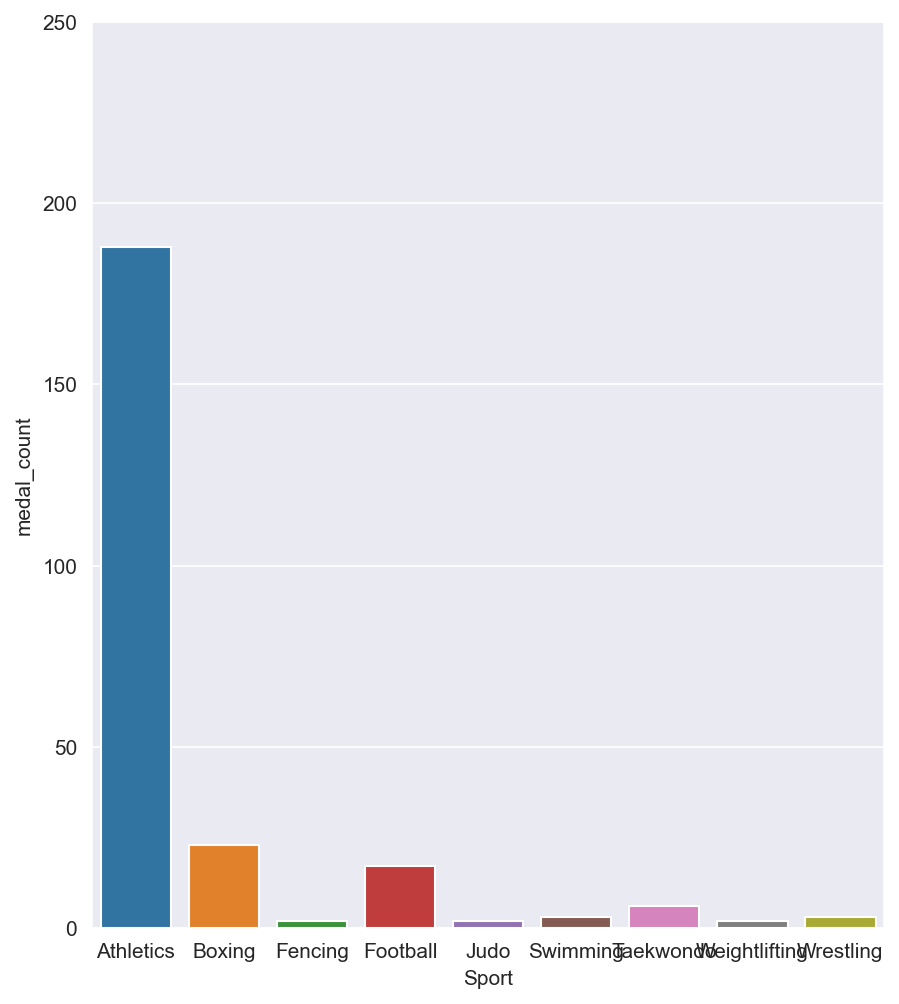

In [27]:
#아프리카 상위2종목 하위2종목 그래프
df_graph = new_df.sort_values(by='region_y')
sns.set_style('darkgrid')
fig = plt.figure(figsize=(15, 8))
area1 = fig.add_subplot(1,2,1)
#area2 = fig.add_subplot(1,2,2)
plt.xlim(19,80)
plt.ylim(0,250)
sns.barplot(data =sport_region_medal[sport_region_medal['region_y']=='Africa'], x="Sport", y="medal_count", ax = area1)
sns.barplot(data =sport_region_medal[sport_region_medal['region_y']=='Oceania'], x="Sport", y="medal_count", ax = area2)

plt.show()

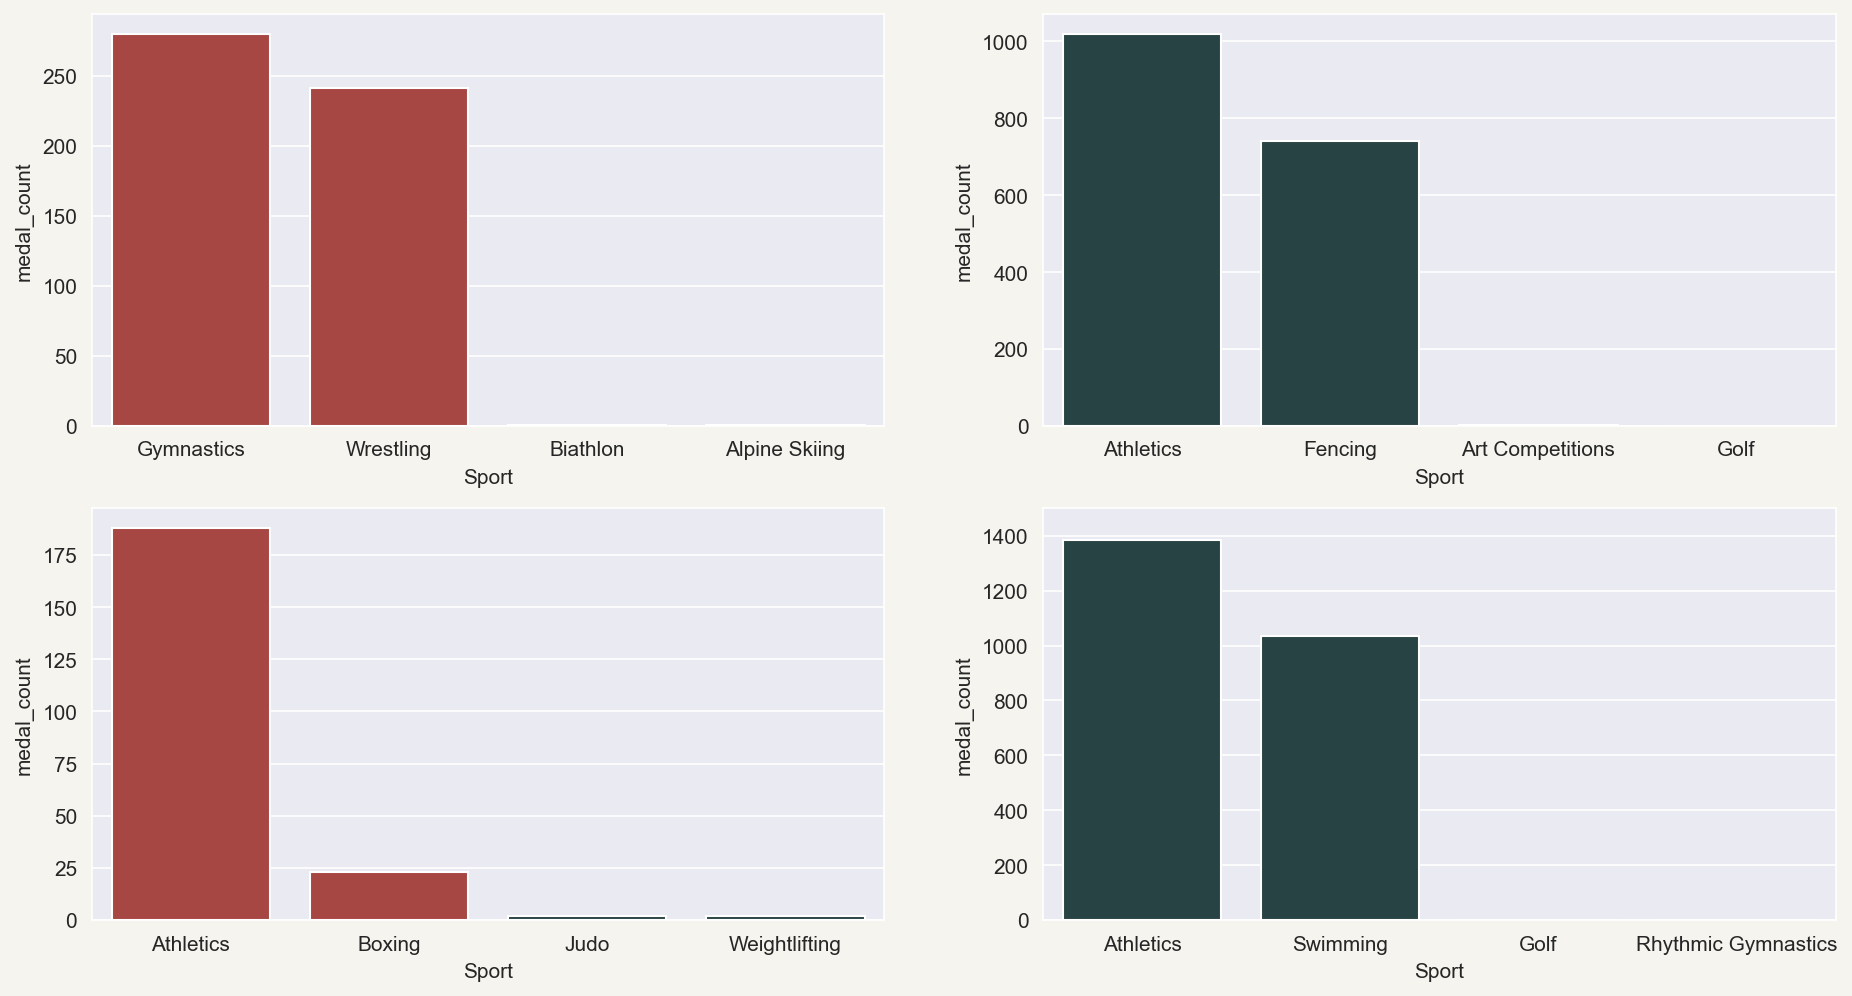

In [60]:
#대륙별 상위2종목 하위2종목 그래프
df_graph = new_df.sort_values(by='region_y')
sns.set_style('darkgrid')

fig = plt.figure(figsize=(15, 8),facecolor=background_color)
area1 = fig.add_subplot(2,2,1)
area2 = fig.add_subplot(2,2,2)
area3 = fig.add_subplot(2,2,3)
area4 = fig.add_subplot(2,2,4)

plt.xlim(19,80)
plt.ylim(0,1500)

sns.set_palette(['#B73832','#B73832','#244747','#244747'])
sns.barplot(data = asia_concat[asia_concat['region_y']=='Asia'], x="Sport", y="Asia", ax = area1)
sns.set_palette(['#244747','#244747','#B73832','#B73832'])

sns.barplot(data = europe_concat[europe_concat['region_y']=='Europe'], x="Sport", y="Eroupe", ax = area2)
sns.set_palette(['#B73832','#B73832','#244747','#244747'])

sns.barplot(data = africa_concat[africa_concat['region_y']=='Africa'], x="Sport", y="Africa", ax = area3)
sns.set_palette(['#244747','#244747','#B73832','#B73832'])

sns.barplot(data = americas_concat[americas_concat['region_y']=='Americas'], x="Sport", y="Americas", ax = area4)

plt.show()

In [55]:
#대륙별 상위2종목 하위2종목 그래프
df_graph = new_df.sort_values(by='region_y')
sns.set_style('darkgrid')

fig = plt.figure(figsize=(15, 8),facecolor=background_color)
area1 = fig.add_subplot(2,2,1)
area2 = fig.add_subplot(2,2,2)
area3 = fig.add_subplot(2,2,3)
area4 = fig.add_subplot(2,2,4)

plt.xlim(19,80)
plt.ylim(0,1500)
colors = []

sns.barplot(data = asia_concat[asia_concat['region_y']=='Asia'], x="Sport", y="medal_count", ax = area1, color = 'gray'. title = "good")
sns.barplot(data = europe_concat[europe_concat['region_y']=='Europe'], x="Sport", y="medal_count", ax = area2, color ='#B73832')
sns.barplot(data = africa_concat[africa_concat['region_y']=='Africa'], x="Sport", y="medal_count", ax = area3, color = '#244747'
sns.barplot(data = americas_concat[americas_concat['region_y']=='Americas'], x="Sport", y="medal_count", ax = area4, color ='red')

plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_15892/3963726289.py, line 15)

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('athlete_events.csv')
df.shape

(271116, 15)

In [2]:
# 한글 포트깨지는 현상 대응하기
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# font_path = "./한글폰트.ttf" # 폰트 파일 위치
font_path = "C:/Windows/Fonts/NGULIM.TTF"

In [3]:
df['Medal'] = df['Medal'].fillna(value='NO')

In [4]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NO
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NO
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NO
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NO
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NO
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NO
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NO


In [5]:
sns.set_style('darkgrid')
sns.distplot
fig = plt.figure(figsize=(20, 15))

<Figure size 1440x1080 with 0 Axes>

In [6]:
df.Sport.unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [7]:
df['Team'].unique()

array(['China', 'Denmark', 'Denmark/Sweden', ..., 'Solos Carex',
       'Dow Jones', 'Digby'], dtype=object)

In [8]:
df.Medal

0           NO
1           NO
2           NO
3         Gold
4           NO
          ... 
271111      NO
271112      NO
271113      NO
271114      NO
271115      NO
Name: Medal, Length: 271116, dtype: object

## 5. 흥미롭게 볼만한 팩트 체크,

### 1960년대 전후로 '수영' 선수들의 신장분포

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


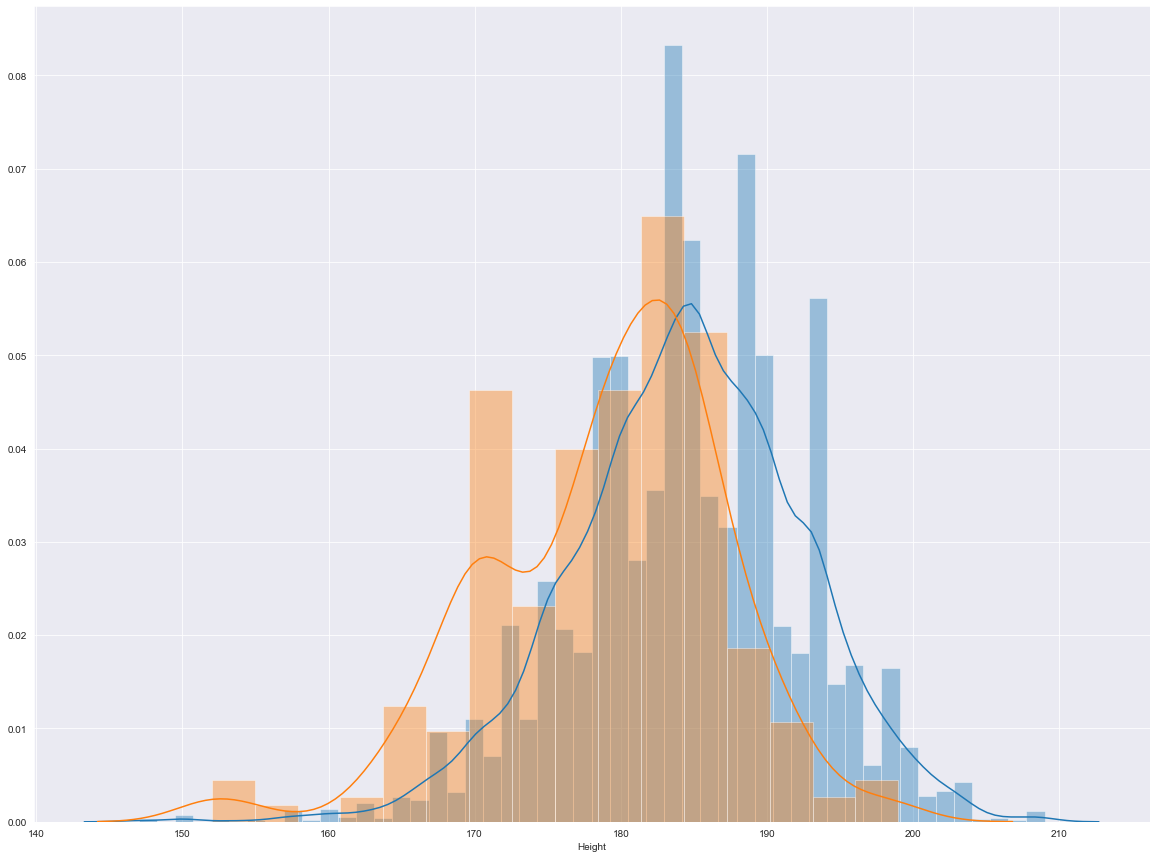

In [9]:
sns.set_style('darkgrid') 
plt.figure(figsize=(20,15))
sns.distplot(df[df.Sex=='M'][df.Sport == 'Swimming'][df.Year >= 1960].Height.dropna()) #파
sns.distplot(df[df.Sex=='M'][df.Sport == 'Swimming'][df.Year < 1960].Height.dropna()) # 주

### 근대 5종경기에서 신체 전성기 나이는?


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


(<matplotlib.axes._subplots.AxesSubplot at 0x27c6fe75508>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27c6fe75508>)

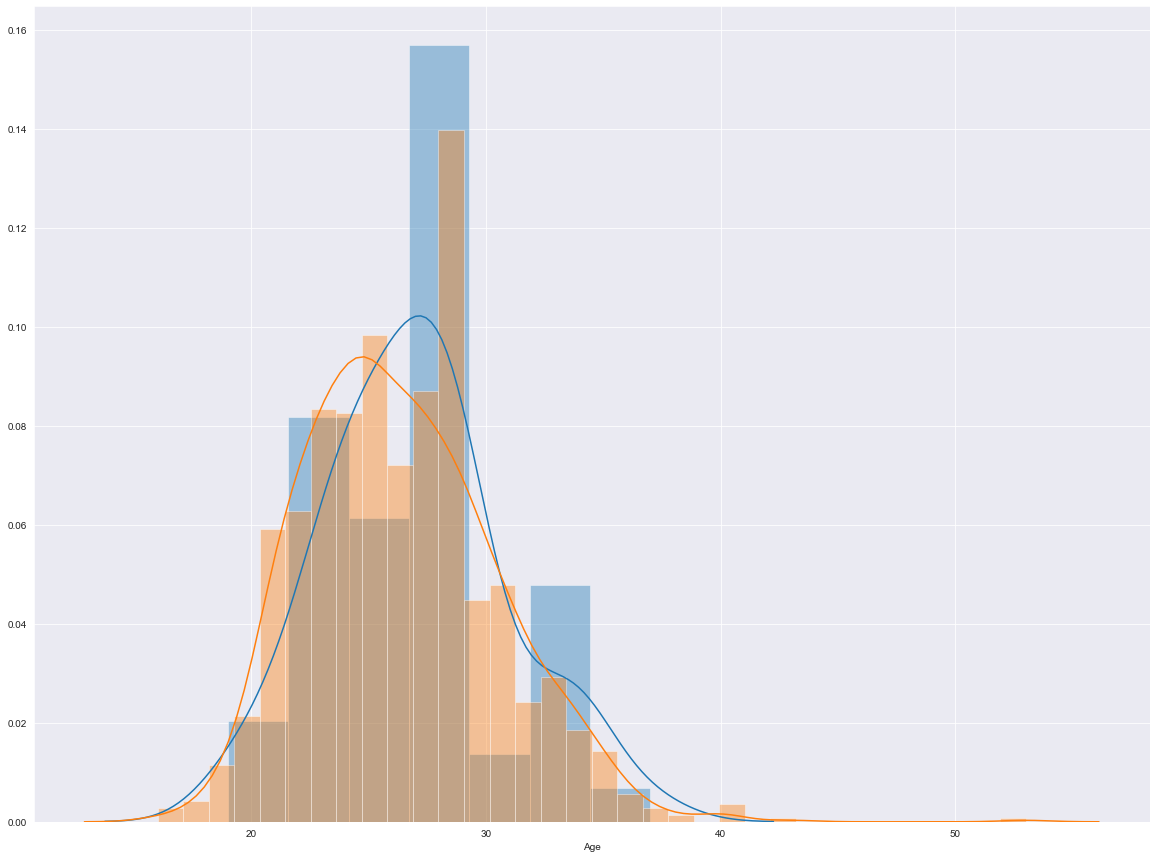

In [12]:
sns.set_style('darkgrid') 
plt.figure(figsize=(20,15))
(sns.distplot(df[df.Sex=='M'][ df.Sport=='Modern Pentathlon'][df.Medal =='Gold'].Age.dropna()),
sns.distplot(df[df.Sex=='M'][df.Sport=='Modern Pentathlon'][df.Medal == 'NO'].Age.dropna())
)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### 특정 나라별 농구선수 신장 분포


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


(<matplotlib.axes._subplots.AxesSubplot at 0x27c7032ec88>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27c7032ec88>)

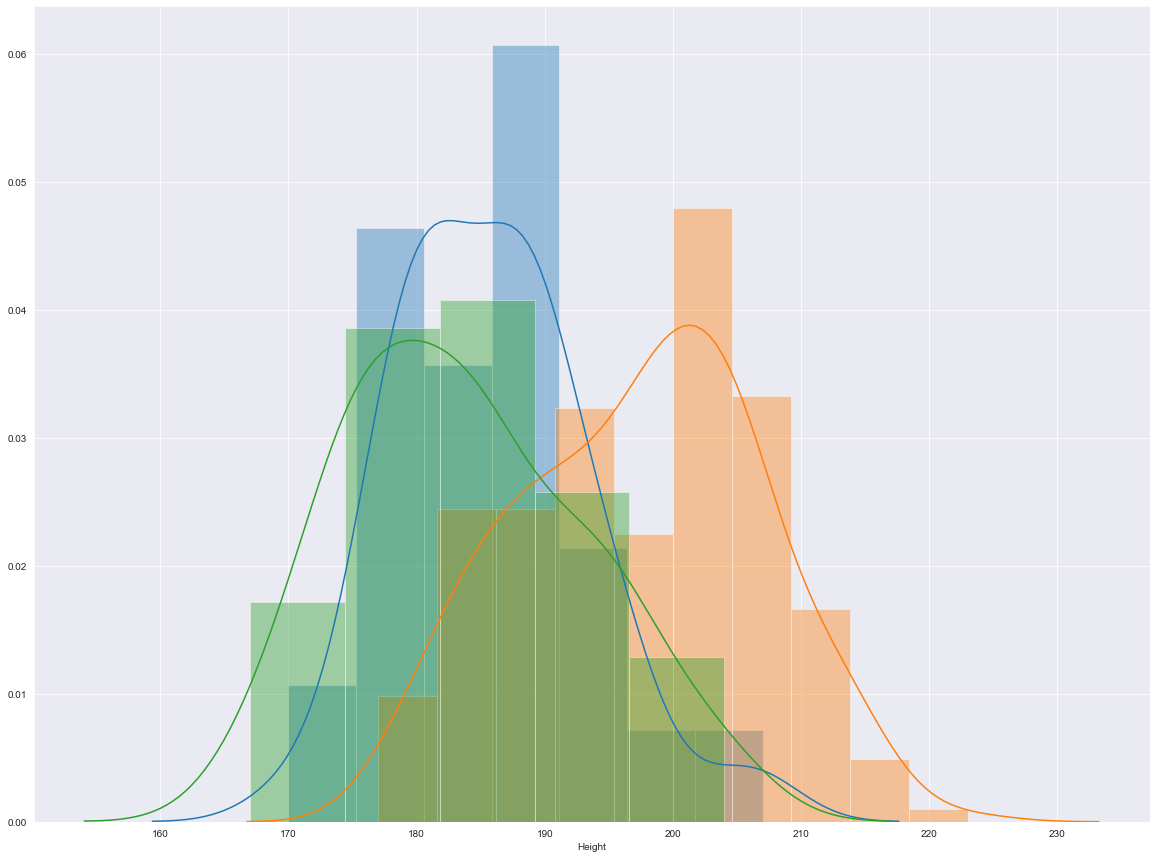

In [14]:
sns.set_style('darkgrid') 
plt.figure(figsize=(20,15))
(sns.distplot(df[df.Sex=='M'][ df.Sport=='Basketball'][df.Team=='South Korea'].Height.dropna()),
sns.distplot(df[df.Sex=='M'][df.Sport=='Basketball'][df.Team=='United States'].Height.dropna()),
 sns.distplot(df[df.Sex=='M'][df.Sport=='Basketball'][df.Team=='Japan'].Height.dropna())
)

## 3. 여성들의 올림픽 출전

### 최초 올림픽 출전 년도 

In [20]:
#여성의 최초 올림픽 출전 -> 1894년에는 출전하지 못하였다는 것을 알 수 있음.
df[df.Sex=='F'].Year.min()

1900

### 여성 운동선수들의 올림픽 참여 추세
 - 그래프로 시각화 한 결과, 매 해 마다 증가하는 추세를 나타낸다.

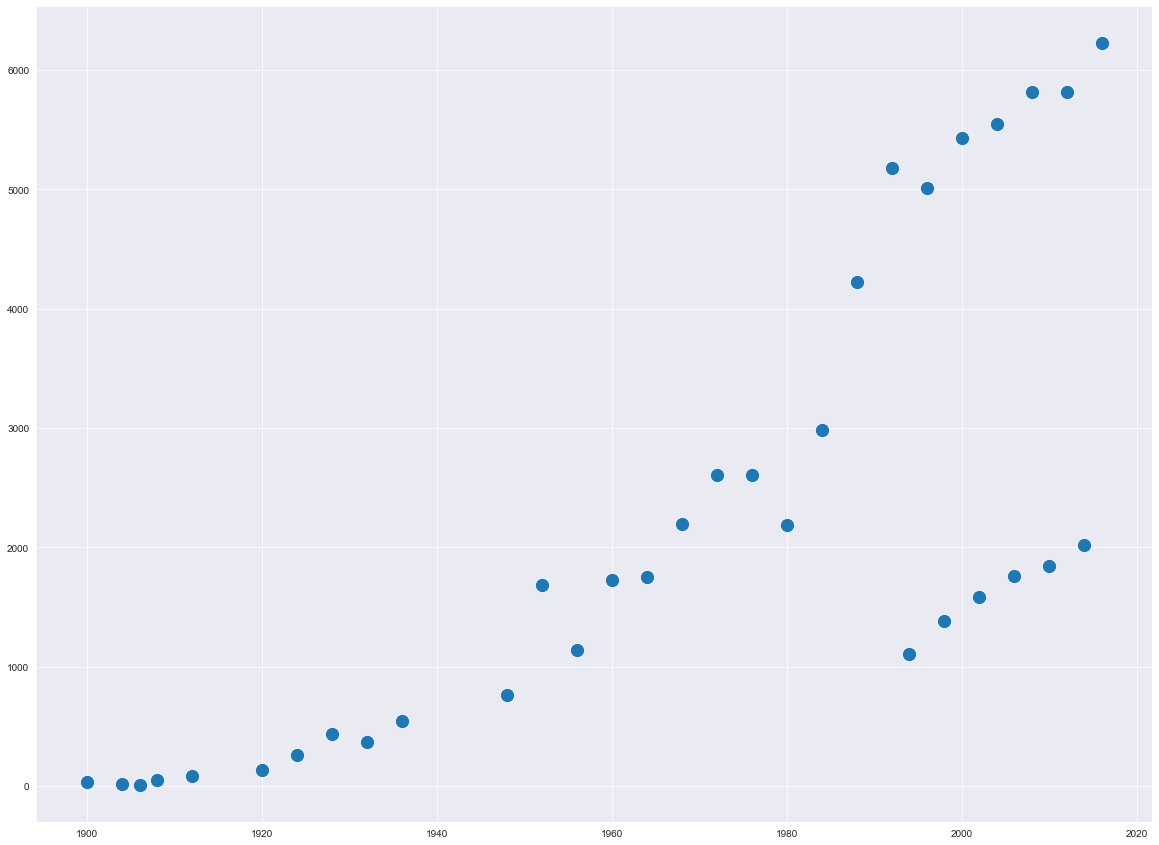

In [21]:
sns.set_style('darkgrid') 
plt.figure(figsize=(20,15))
female = df[df.Sex=='F']
year_count = female.groupby('Year').agg('count')
years = list(year_count.index)
counts =  list(year_count.Name)
sns.scatterplot(x = years, y = counts, s = 200)

### 남, 여 올림픽 출전 인원 비교



(<matplotlib.axes._subplots.AxesSubplot at 0x27c711b16c8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27c711b16c8>)

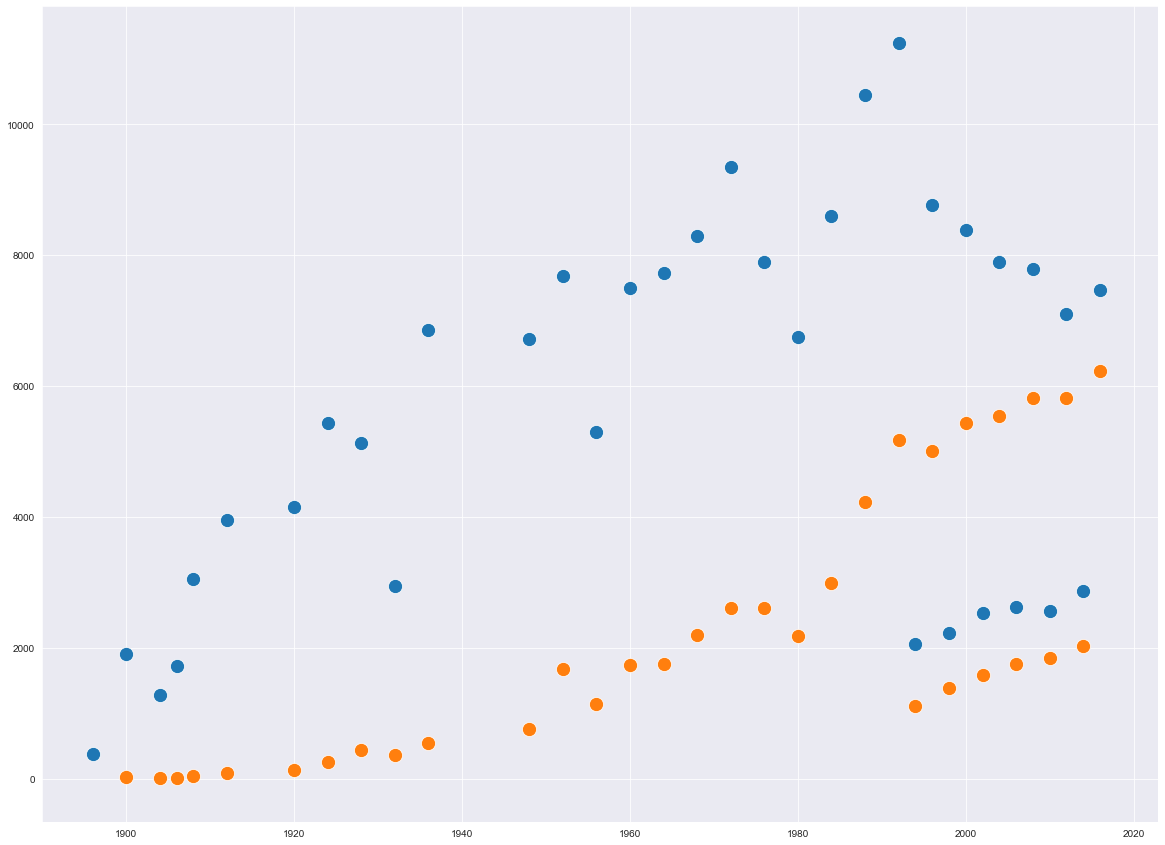

In [22]:
sns.set_style('darkgrid') 
plt.figure(figsize=(20,15))
f_year_count = df[df.Sex=='F'].groupby('Year').agg('count').Name
m_year_count = df[df.Sex=='M'].groupby('Year').agg('count').Name
(sns.scatterplot(data= m_year_count,s = 200),
 sns.scatterplot(data =f_year_count,s = 200))

## 8. 올림픽 출전 선수들의 최소, 최대, 평균 신장(종목별) 및 체중 (대륙별)


In [25]:
sport_weight_height.Height.dropna().sort_values('mean', ascending=False)


,min,max,mean
Sport,,,
Basketball,163.0,226.0,194.872624
Beach Volleyball,179.0,212.0,193.290909
Volleyball,170.0,219.0,193.265660
Handball,140.0,214.0,188.778373
Rowing,132.0,209.0,186.882698
Water Polo,154.0,206.0,186.801739
Tennis,162.0,208.0,184.847806
Swimming,147.0,209.0,184.310928
Rugby Sevens,169.0,198.0,182.834437


In [6]:
# Height, Weight 컬럼의 결측치 제거
df_drop = df1.dropna(subset = ['Height', 'Weight']).reset_index(drop = True) 
df_drop.drop_duplicates(inplace = True)

df = df_drop
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,name,alpha-3,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,CHN,Asia
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,CHN,Asia
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,CHN,Asia
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,CHN,Asia
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,CHN,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151361,86663,Tavevele Noa,M,20.0,176.0,74.0,Tuvalu,TUV,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 100 metres,NaN,Tuvalu,TUV,Oceania
151362,120422,Etimoni Timuani,M,24.0,184.0,72.0,Tuvalu,TUV,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 100 metres,NaN,Tuvalu,TUV,Oceania
151363,46491,Margret Hassan,F,18.0,160.0,55.0,South Sudan,SSD,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 200 metres,NaN,South Sudan,SSD,Africa
151364,58765,Santino Kenyi,M,22.0,180.0,75.0,South Sudan,SSD,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN,South Sudan,SSD,Africa


In [10]:
# 컨디션

# 대륙
con1 = df['region'] == "Asia"
con2 = df['region'] == "Africa"
con3 = df['region'] == "Americas"
con4 = df['region'] == "Europe"
con5 = df['region'] == "Oceania"

# 성별
con11 = df['Sex'] == "M"
con12 = df['Sex'] == "F"

# 신장, 체중
con21 = df['Height'] > 0
con22 = df['Weight'] > 0

# 메달리스트
con31 = df['Medal'] == "Gold"
con32 = df['Medal'] == "Silver"
con33 = df['Medal'] == "Bronze"

# df[con1 & con2] # and
# df[con1 | con2] # or

In [11]:
df['Weight'].describe()

count    151353.000000
mean         70.386798
std          14.352953
min          25.000000
25%          60.000000
50%          69.000000
75%          79.000000
max         214.000000
Name: Weight, dtype: float64

In [12]:
# 대륙별 남성 키
df['Height'][con1 & con11 & con21]
df['Height'][con2 & con11 & con21]
df['Height'][con3 & con11 & con21]
df['Height'][con4 & con11 & con21]
df['Height'][con5 & con11 & con21]

# 대륙별 남성 체중
df['Weight'][con1 & con11 & con22]
df['Weight'][con2 & con11 & con22]
df['Weight'][con3 & con11 & con22]
df['Weight'][con4 & con11 & con22]
df['Weight'][con5 & con11 & con22]

# 대륙별 여성 키
df['Height'][con1 & con12 & con21]
df['Height'][con2 & con12 & con21]
df['Height'][con3 & con12 & con21]
df['Height'][con4 & con12 & con21]
df['Height'][con5 & con12 & con21]

# 대륙별 여성 체중
df['Weight'][con1 & con12 & con22]
df['Weight'][con2 & con12 & con22]
df['Weight'][con3 & con12 & con22]
df['Weight'][con4 & con12 & con22]
df['Weight'][con5 & con12 & con22]

81524     68.0
81533     72.0
81545     64.0
81546     64.0
81547     70.0
          ... 
151345    59.0
151346    58.0
151348    67.0
151352    65.0
151357    52.0
Name: Weight, Length: 3275, dtype: float64

Text(0.5, 1.0, '올림픽 참가 남성 신장')

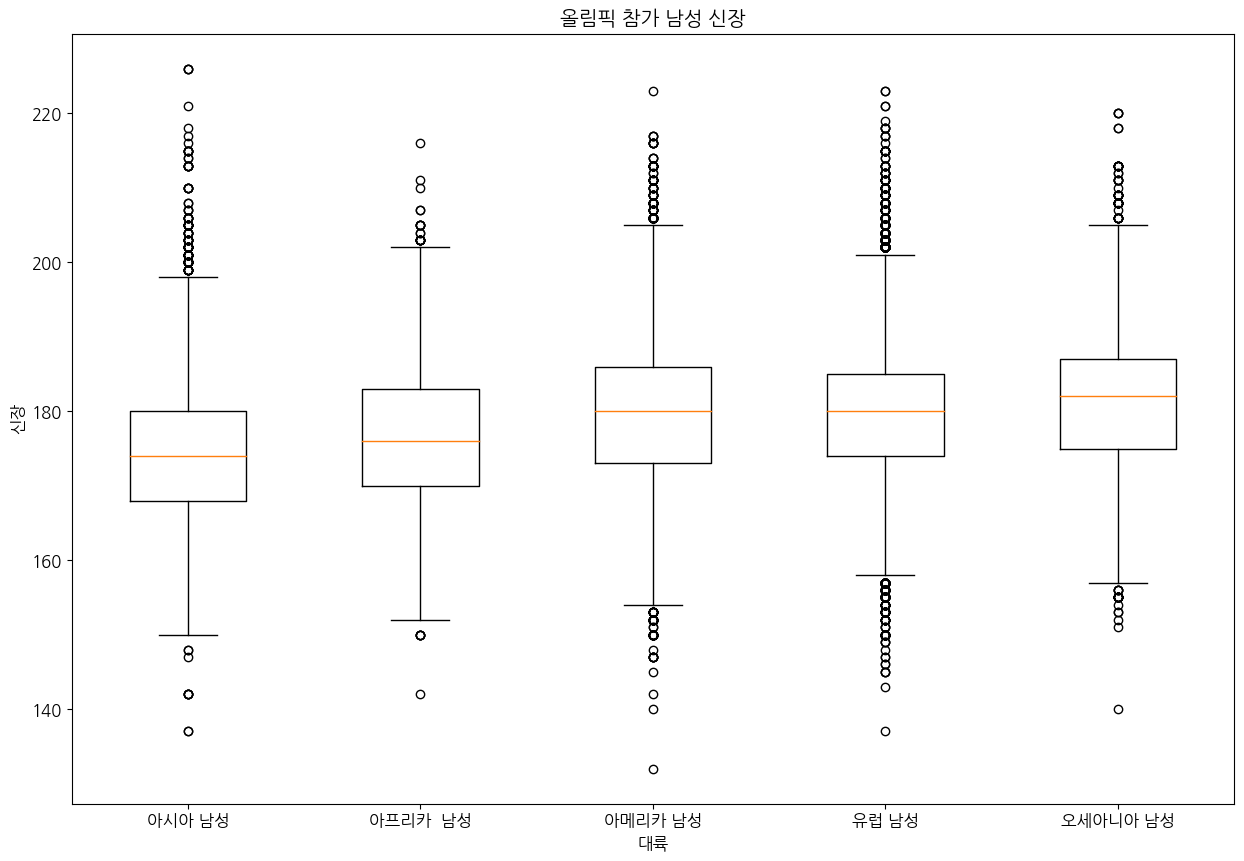

In [13]:
# 올림픽 참가 남성 신장

# 1. 기본 스타일 설정
plt. style. use('default')
plt. rcParams['figure.figsize'] = (15, 10)
plt. rcParams['font.size'] = 12

# 2. 데이터 준비
height_asia_m = df['Height'][con1 & con11 & con21]
height_africa_m = df['Height'][con2 & con11 & con21]
height_america_m = df['Height'][con3 & con11 & con21]
height_europe_m = df['Height'][con4 & con11 & con21]
height_oceania_m = df['Height'][con5 & con11 & con21]

# 3. 그래프 그리기
fig, ax = plt. subplots()

ax.boxplot([height_asia_m, height_africa_m, height_america_m, height_europe_m, height_oceania_m], labels=['아시아 남성', '아프리카  남성', '아메리카 남성', '유럽 남성', '오세아니아 남성'])
ax.set_xlabel('대륙')
ax.set_ylabel('신장')
ax.set_title('올림픽 참가 남성 신장')

Text(0.5, 1.0, '올림픽 참가 남성 체중')

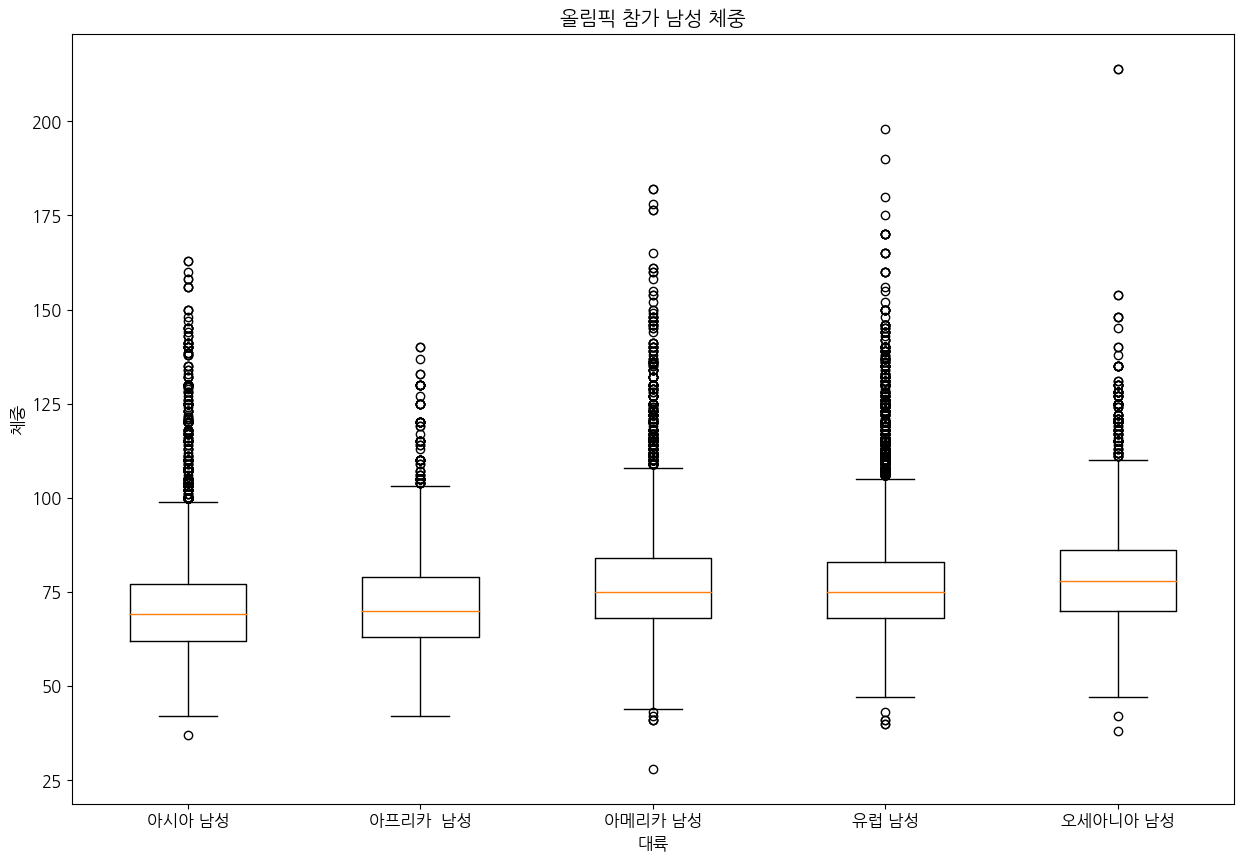

In [14]:
# 올림픽 참가 남성 체중

# 1. 기본 스타일 설정
plt. style. use('default')
plt. rcParams['figure.figsize'] = (15, 10)
plt. rcParams['font.size'] = 12

# 2. 데이터 준비
weight_asia_m = df['Weight'][con1 & con11 & con22]
weight_africa_m = df['Weight'][con2 & con11 & con22]
weight_america_m = df['Weight'][con3 & con11 & con22]
weight_europe_m = df['Weight'][con4 & con11 & con22]
weight_oceania_m = df['Weight'][con5 & con11 & con22]

# 3. 그래프 그리기
fig, ax = plt. subplots()

ax.boxplot([weight_asia_m, weight_africa_m, weight_america_m, weight_europe_m, weight_oceania_m], labels=['아시아 남성', '아프리카  남성', '아메리카 남성', '유럽 남성', '오세아니아 남성'])
ax.set_xlabel('대륙')
ax.set_ylabel('체중')
ax.set_title('올림픽 참가 남성 체중')

Text(0.5, 1.0, '올림픽 참가 여성 신장')

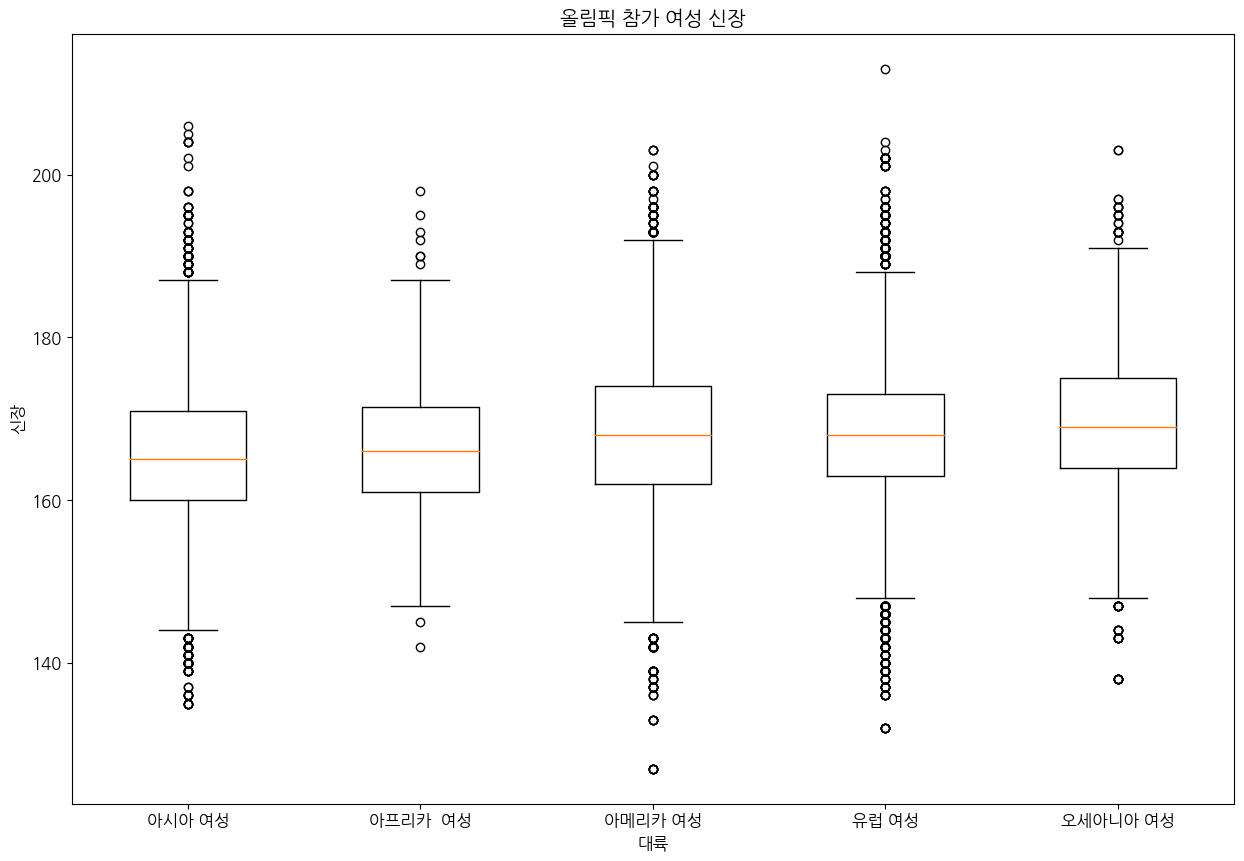

In [15]:
# 올림픽 참가 여성 신장

# 1. 기본 스타일 설정
plt. style. use('default')
plt. rcParams['figure.figsize'] = (15, 10)
plt. rcParams['font.size'] = 12

# 2. 데이터 준비
height_asia = df['Height'][con1 & con12 & con21]
height_africa = df['Height'][con2 & con12 & con21]
height_america = df['Height'][con3 & con12 & con21]
height_europe = df['Height'][con4 & con12 & con21]
height_oceania = df['Height'][con5 & con12 & con21]

# 3. 그래프 그리기
fig, ax = plt. subplots()

ax.boxplot([height_asia, height_africa, height_america, height_europe, height_oceania], labels=['아시아 여성', '아프리카  여성', '아메리카 여성', '유럽 여성', '오세아니아 여성'])
ax.set_xlabel('대륙')
ax.set_ylabel('신장')
ax.set_title('올림픽 참가 여성 신장')

Text(0.5, 1.0, '올림픽 참가 여성 체중')

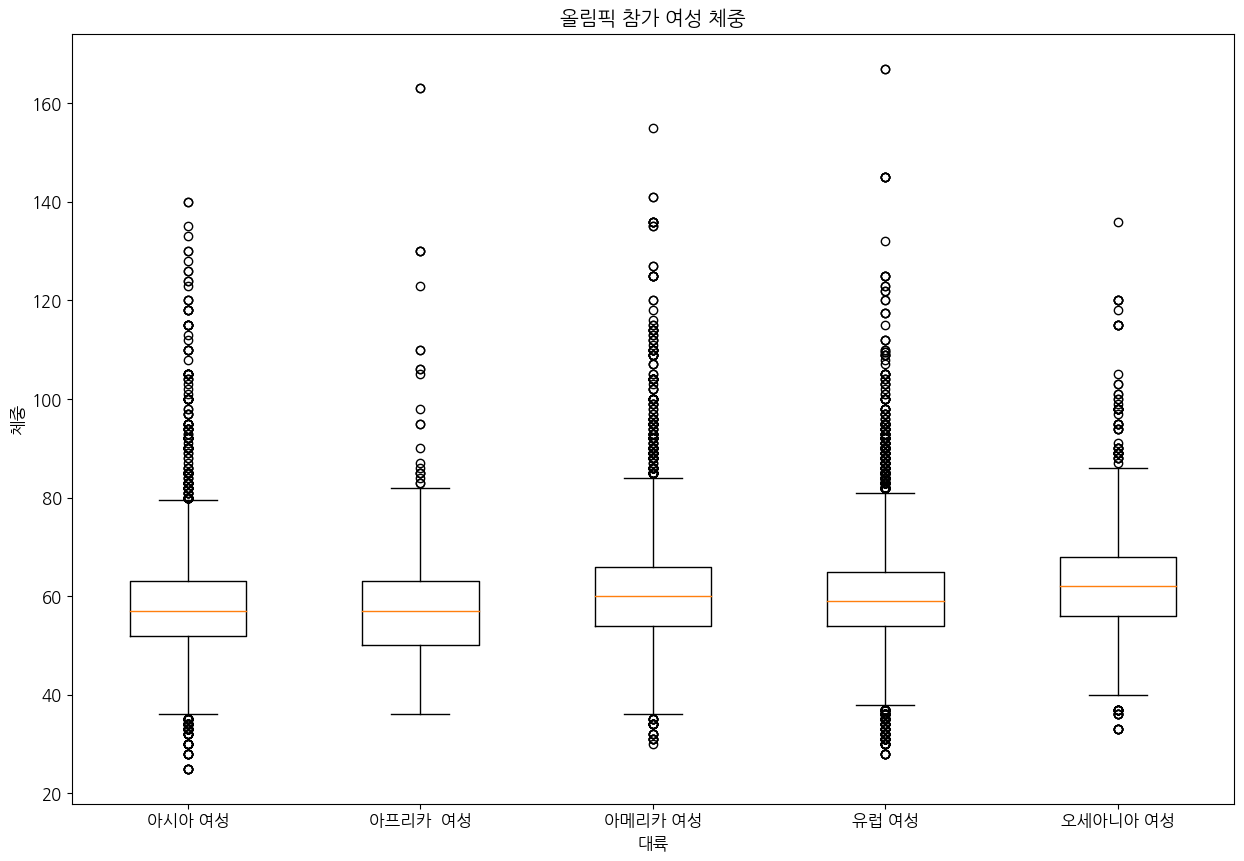

In [16]:
# 올림픽 참가 여성 체중

# 1. 기본 스타일 설정
plt. style. use('default')
plt. rcParams['figure.figsize'] = (15, 10)
plt. rcParams['font.size'] = 12

# 2. 데이터 준비
weight_asia_w = df['Weight'][con1 & con12 & con22]
weight_africa_w = df['Weight'][con2 & con12 & con22]
weight_america_w = df['Weight'][con3 & con12 & con22]
weight_europe_w = df['Weight'][con4 & con12 & con22]
weight_oceania_w = df['Weight'][con5 & con12 & con22]

# 3. 그래프 그리기
fig, ax = plt. subplots()

ax.boxplot([weight_asia_w, weight_africa_w, weight_america_w, weight_europe_w, weight_oceania_w], labels=['아시아 여성', '아프리카  여성', '아메리카 여성', '유럽 여성', '오세아니아 여성'])
ax.set_xlabel('대륙')
ax.set_ylabel('체중')
ax.set_title('올림픽 참가 여성 체중')

Text(0.5, 1.0, '여성 체중')

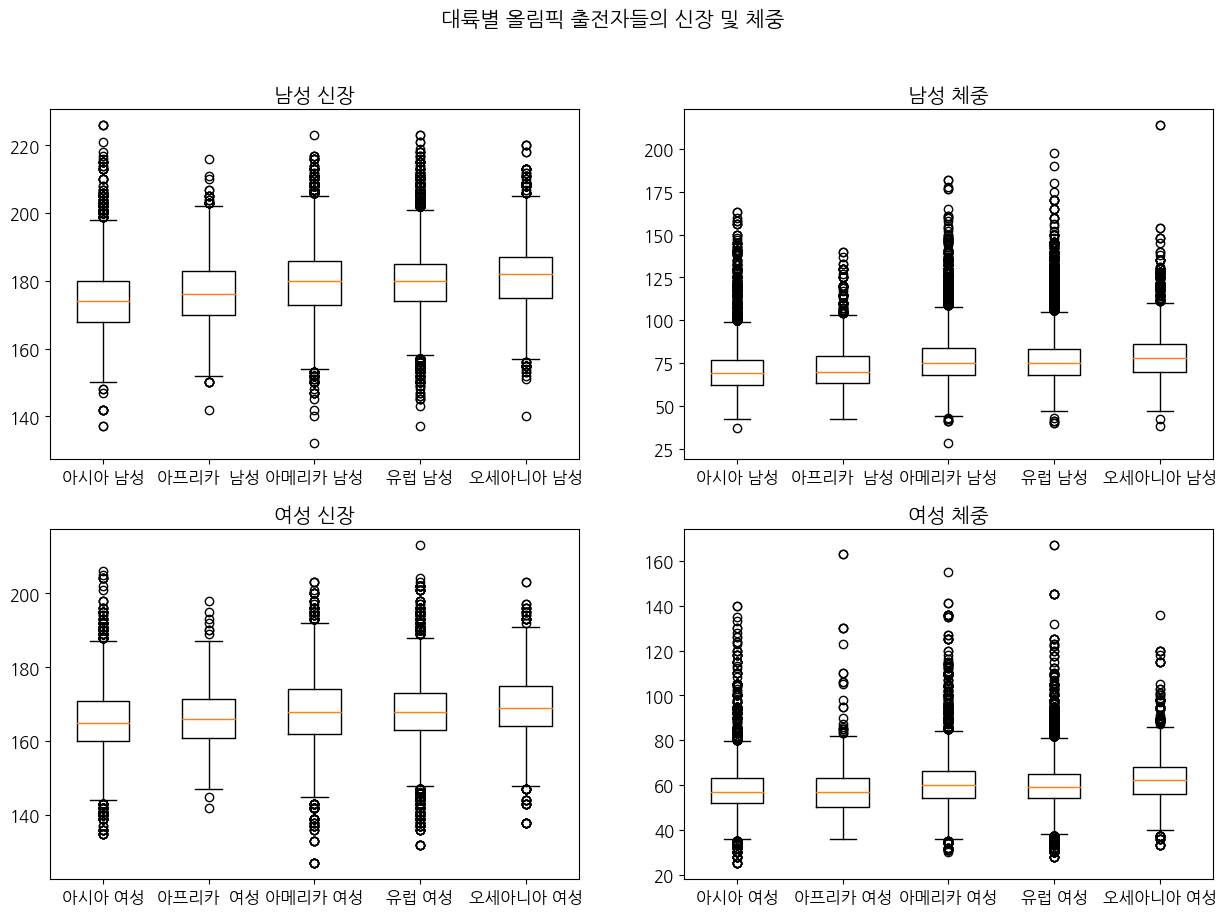

In [17]:
# 대륙별 올림픽 출전자들의 신장 및 체중
# 박스플롯 4개 서브플롯으로 취합

plt.suptitle('대륙별 올림픽 출전자들의 신장 및 체중', fontsize=15)
plt.subplot(2,2,1)
plt.boxplot([height_asia_m, height_africa_m, height_america_m, height_europe_m, height_oceania_m], 
            labels=['아시아 남성', '아프리카  남성', '아메리카 남성', '유럽 남성', '오세아니아 남성'])
plt.title('남성 신장')

plt.subplot(2,2,2)
plt.boxplot([weight_asia_m, weight_africa_m, weight_america_m, weight_europe_m, weight_oceania_m], 
            labels=['아시아 남성', '아프리카  남성', '아메리카 남성', '유럽 남성', '오세아니아 남성'])
plt.title('남성 체중')

plt.subplot(2,2,3)
plt.boxplot([height_asia, height_africa, height_america, height_europe, height_oceania], 
            labels=['아시아 여성', '아프리카  여성', '아메리카 여성', '유럽 여성', '오세아니아 여성'])
plt.title('여성 신장')

plt.subplot(2,2,4)
plt.boxplot([weight_asia_w, weight_africa_w, weight_america_w, weight_europe_w, weight_oceania_w], 
            labels=['아시아 여성', '아프리카 여성', '아메리카 여성', '유럽 여성', '오세아니아 여성'])
plt.title('여성 체중')

In [18]:
# 대륙별 금메달 남성 키
h_asia_m_g = df['Height'][con1 & con11 & con21 & con31]
h_africa_m_g = df['Height'][con2 & con11 & con21 & con31]
h_america_m_g = df['Height'][con3 & con11 & con21 & con31]
h_europe_m_g = df['Height'][con4 & con11 & con21 & con31]
h_oceania_m_g = df['Height'][con5 & con11 & con21 & con31]

# 대륙별 금메달 남성 체중
w_asia_m_g = df['Weight'][con1 & con11 & con22 & con31]
w_africa_m_g = df['Weight'][con2 & con11 & con22 & con31]
w_america_m_g = df['Weight'][con3 & con11 & con22 & con31]
w_europe_m_g = df['Weight'][con4 & con11 & con22 & con31]
w_oceania_m_g = df['Weight'][con5 & con11 & con22 & con31]

# 대륙별 금메달 여성 키
h_asia_f_g = df['Height'][con1 & con12 & con21 & con31]
h_africa_f_g = df['Height'][con2 & con12 & con21 & con31]
h_america_f_g = df['Height'][con3 & con12 & con21 & con31]
h_europe_f_g = df['Height'][con4 & con12 & con21 & con31]
h_oceania_f_g = df['Height'][con5 & con12 & con21 & con31]

# 대륙별 금메달 여성 체중
w_asia_f_g = df['Weight'][con1 & con12 & con22 & con31]
w_africa_f_g = df['Weight'][con2 & con12 & con22 & con31]
w_america_f_g = df['Weight'][con3 & con12 & con22 & con31]
w_europe_f_g = df['Weight'][con4 & con12 & con22 & con31]
w_oceania_f_g = df['Weight'][con5 & con12 & con22 & con31]

Text(0.5, 1.0, '여성 체중')

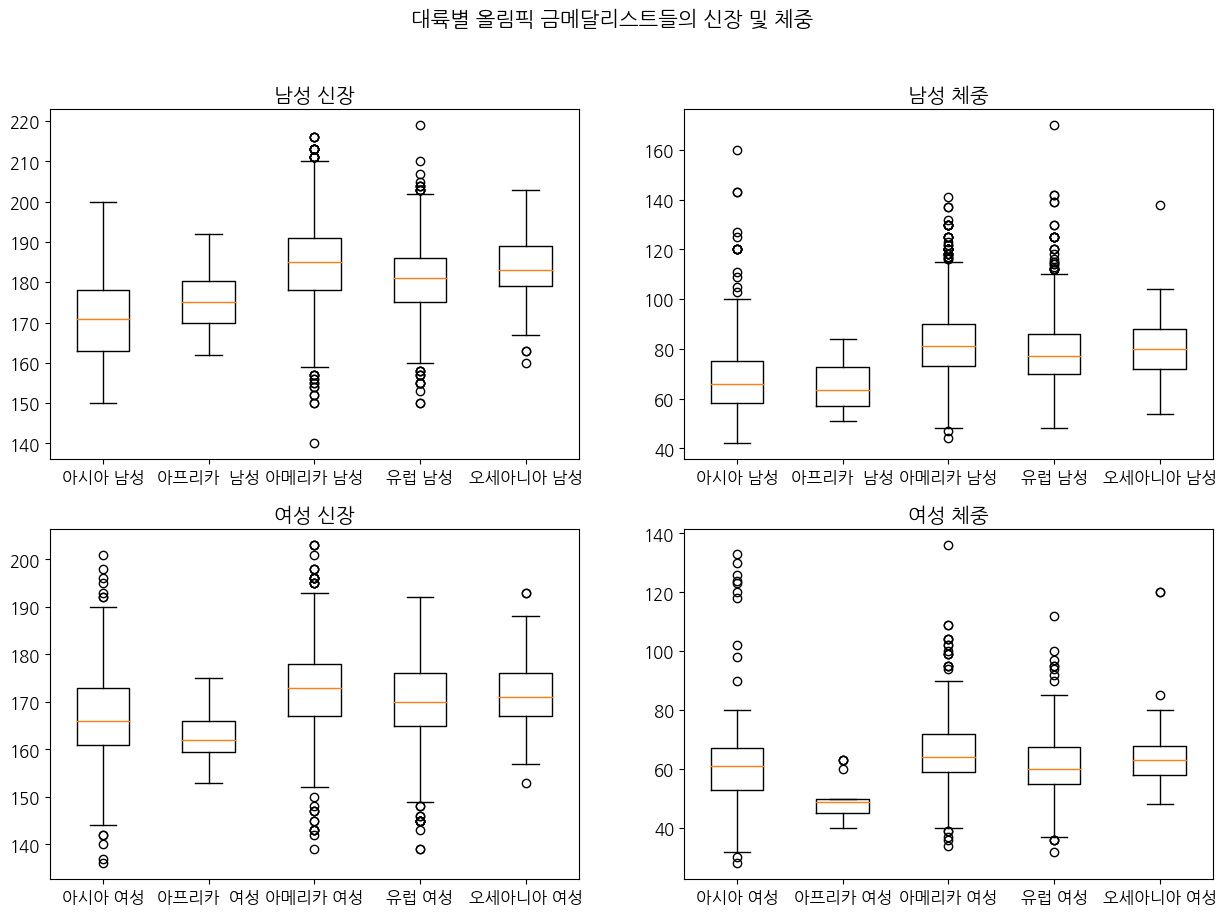

In [19]:
# 대륙별 올림픽 은메달리스트들의 신장 및 체중
# 박스플롯 4개 서브플롯으로 취합

plt.suptitle('대륙별 올림픽 금메달리스트들의 신장 및 체중', fontsize=15)
plt.subplot(2,2,1)
plt.boxplot([h_asia_m_g, h_africa_m_g, h_america_m_g, h_europe_m_g, h_oceania_m_g], 
            labels=['아시아 남성', '아프리카  남성', '아메리카 남성', '유럽 남성', '오세아니아 남성'])
plt.title('남성 신장')

plt.subplot(2,2,2)
plt.boxplot([w_asia_m_g, w_africa_m_g, w_america_m_g, w_europe_m_g, w_oceania_m_g], 
            labels=['아시아 남성', '아프리카  남성', '아메리카 남성', '유럽 남성', '오세아니아 남성'])
plt.title('남성 체중')

plt.subplot(2,2,3)
plt.boxplot([h_asia_f_g, h_africa_f_g, h_america_f_g, h_europe_f_g, h_oceania_f_g], 
            labels=['아시아 여성', '아프리카  여성', '아메리카 여성', '유럽 여성', '오세아니아 여성'])
plt.title('여성 신장')

plt.subplot(2,2,4)
plt.boxplot([w_asia_f_g, w_africa_f_g, w_america_f_g, w_europe_f_g, w_oceania_f_g], 
            labels=['아시아 여성', '아프리카 여성', '아메리카 여성', '유럽 여성', '오세아니아 여성'])
plt.title('여성 체중')

In [20]:
# 대륙별 은메달 남성 키
h_asia_m_s = df['Height'][con1 & con11 & con21 & con32]
h_africa_m_s = df['Height'][con2 & con11 & con21 & con32]
h_america_m_s = df['Height'][con3 & con11 & con21 & con32]
h_europe_m_s = df['Height'][con4 & con11 & con21 & con32]
h_oceania_m_s = df['Height'][con5 & con11 & con21 & con32]

# 대륙별 은메달 남성 체중
w_asia_m_s = df['Weight'][con1 & con11 & con22 & con32]
w_africa_m_s = df['Weight'][con2 & con11 & con22 & con32]
w_america_m_s = df['Weight'][con3 & con11 & con22 & con32]
w_europe_m_s = df['Weight'][con4 & con11 & con22 & con32]
w_oceania_m_s = df['Weight'][con5 & con11 & con22 & con32]

# 대륙별 은메달 여성 키
h_asia_f_s = df['Height'][con1 & con12 & con21 & con32]
h_africa_f_s = df['Height'][con2 & con12 & con21 & con32]
h_america_f_s = df['Height'][con3 & con12 & con21 & con32]
h_europe_f_s = df['Height'][con4 & con12 & con21 & con32]
h_oceania_f_s = df['Height'][con5 & con12 & con21 & con32]

# 대륙별 은메달 여성 체중
w_asia_f_s = df['Weight'][con1 & con12 & con22 & con32]
w_africa_f_s = df['Weight'][con2 & con12 & con22 & con32]
w_america_f_s = df['Weight'][con3 & con12 & con22 & con32]
w_europe_f_s = df['Weight'][con4 & con12 & con22 & con32]
w_oceania_f_s = df['Weight'][con5 & con12 & con22 & con32]

Text(0.5, 1.0, '여성 체중')

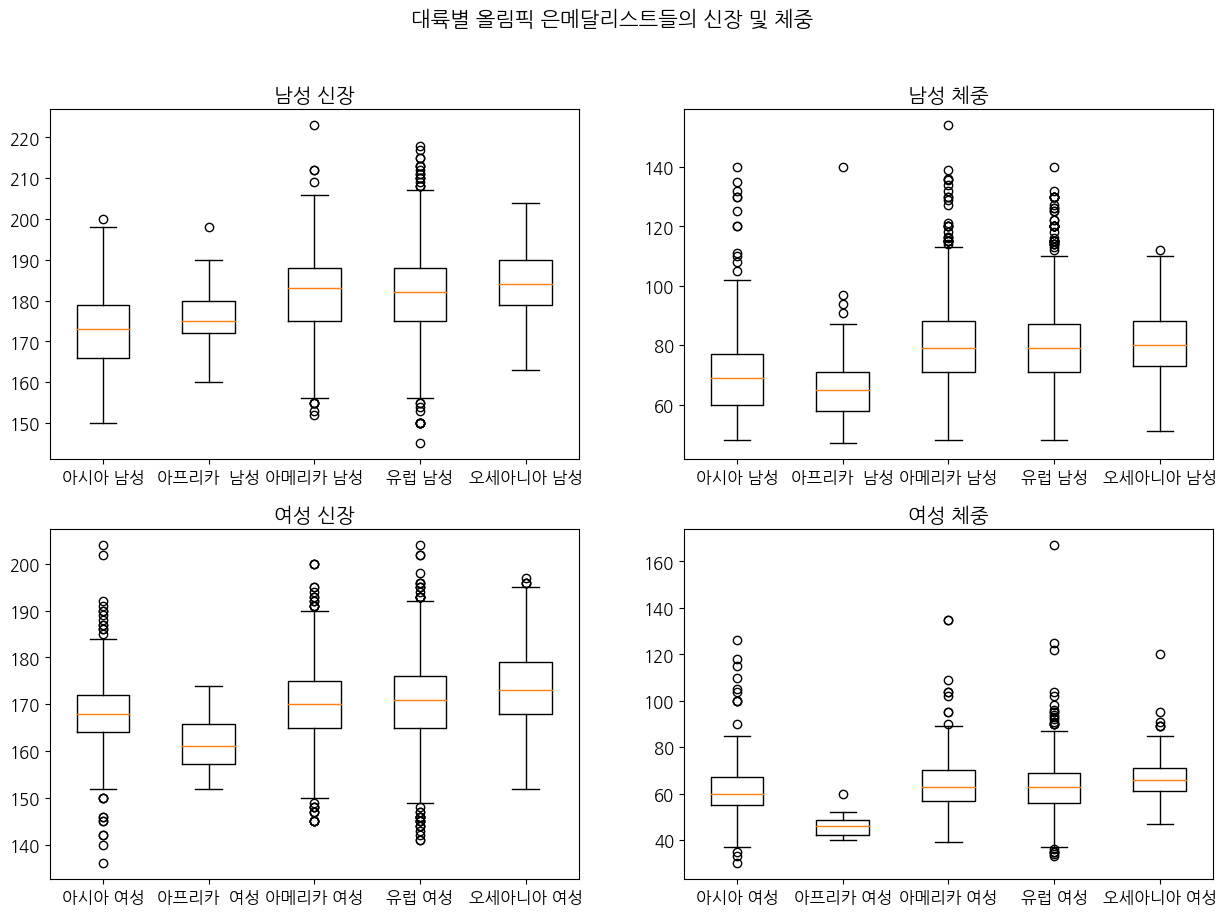

In [21]:
# 대륙별 올림픽 은메달리스트들의 신장 및 체중
# 박스플롯 4개 서브플롯으로 취합

plt.suptitle('대륙별 올림픽 은메달리스트들의 신장 및 체중', fontsize=15)
plt.subplot(2,2,1)
plt.boxplot([h_asia_m_s, h_africa_m_s, h_america_m_s, h_europe_m_s, h_oceania_m_s], 
            labels=['아시아 남성', '아프리카  남성', '아메리카 남성', '유럽 남성', '오세아니아 남성'])
plt.title('남성 신장')


plt.subplot(2,2,2)
plt.boxplot([w_asia_m_s, w_africa_m_s, w_america_m_s, w_europe_m_s, w_oceania_m_s], 
            labels=['아시아 남성', '아프리카  남성', '아메리카 남성', '유럽 남성', '오세아니아 남성'])
plt.title('남성 체중')

plt.subplot(2,2,3)
plt.boxplot([h_asia_f_s, h_africa_f_s, h_america_f_s, h_europe_f_s, h_oceania_f_s], 
            labels=['아시아 여성', '아프리카  여성', '아메리카 여성', '유럽 여성', '오세아니아 여성'])
plt.title('여성 신장')

plt.subplot(2,2,4)
plt.boxplot([w_asia_f_s, w_africa_f_s, w_america_f_s, w_europe_f_s, w_oceania_f_s], 
            labels=['아시아 여성', '아프리카 여성', '아메리카 여성', '유럽 여성', '오세아니아 여성'])
plt.title('여성 체중')


In [22]:
# 대륙별 동메달 남성 키
h_asia_m_b = df['Height'][con1 & con11 & con21 & con33]
h_africa_m_b = df['Height'][con2 & con11 & con21 & con33]
h_america_m_b = df['Height'][con3 & con11 & con21 & con33]
h_europe_m_b = df['Height'][con4 & con11 & con21 & con33]
h_oceania_m_b = df['Height'][con5 & con11 & con21 & con33]

# 대륙별 동메달 남성 체중
w_asia_m_b = df['Weight'][con1 & con11 & con22 & con33]
w_africa_m_b = df['Weight'][con2 & con11 & con22 & con33]
w_america_m_b = df['Weight'][con3 & con11 & con22 & con33]
w_europe_m_b = df['Weight'][con4 & con11 & con22 & con33]
w_oceania_m_b = df['Weight'][con5 & con11 & con22 & con33]

# 대륙별 동메달 여성 키
h_asia_f_b = df['Height'][con1 & con12 & con21 & con33]
h_africa_f_b = df['Height'][con2 & con12 & con21 & con33]
h_america_f_b = df['Height'][con3 & con12 & con21 & con33]
h_europe_f_b = df['Height'][con4 & con12 & con21 & con33]
h_oceania_f_b = df['Height'][con5 & con12 & con21 & con33]

# 대륙별 동메달 여성 체중
w_asia_f_b = df['Weight'][con1 & con12 & con22 & con33]
w_africa_f_b = df['Weight'][con2 & con12 & con22 & con33]
w_america_f_b = df['Weight'][con3 & con12 & con22 & con33]
w_europe_f_b = df['Weight'][con4 & con12 & con22 & con33]
w_oceania_f_b = df['Weight'][con5 & con12 & con22 & con33]

Text(0.5, 1.0, '여성 체중')

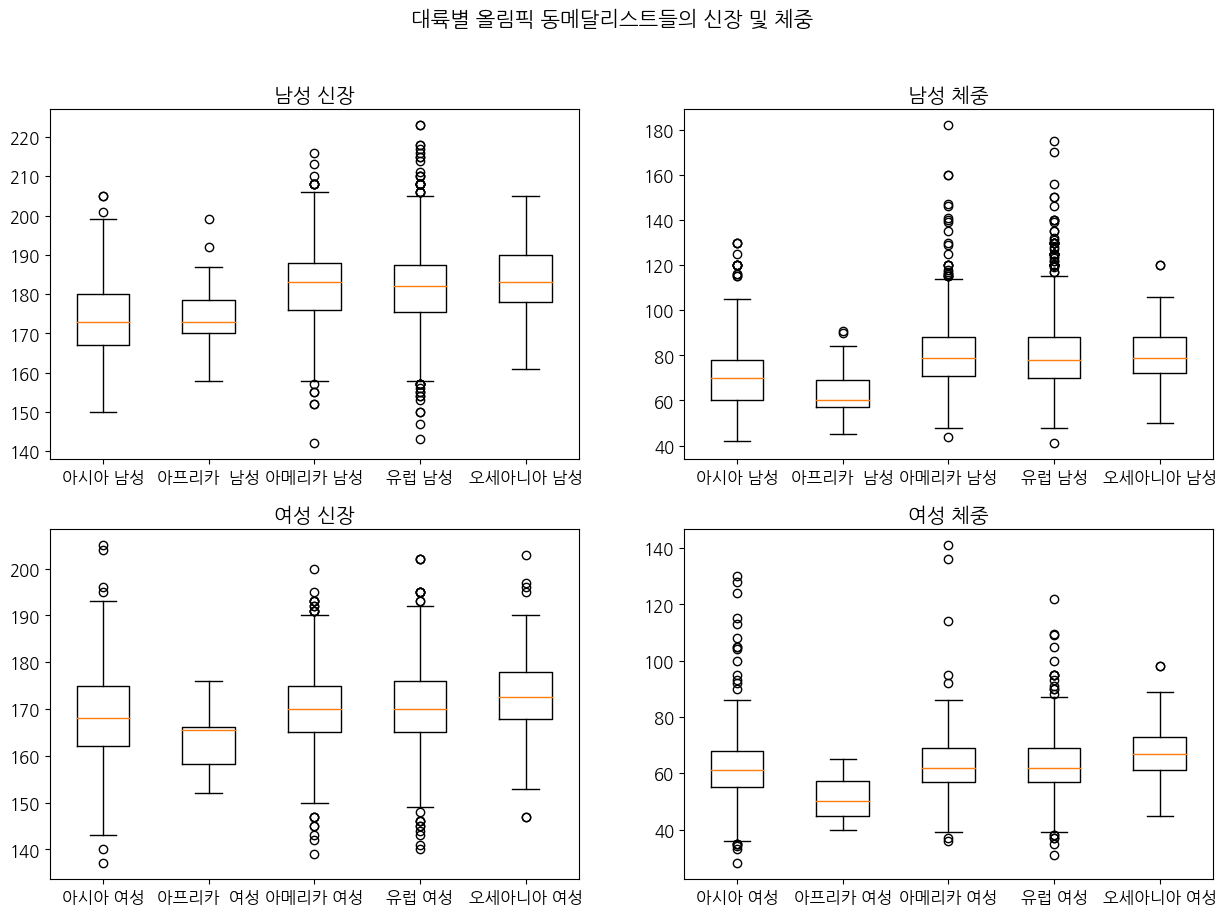

In [23]:
# 대륙별 올림픽 동메달리스트들의 신장 및 체중
# 박스플롯 4개 서브플롯으로 취합

plt.suptitle('대륙별 올림픽 동메달리스트들의 신장 및 체중', fontsize=15)
plt.subplot(2,2,1)
plt.boxplot([h_asia_m_b, h_africa_m_b, h_america_m_b, h_europe_m_b, h_oceania_m_b], 
            labels=['아시아 남성', '아프리카  남성', '아메리카 남성', '유럽 남성', '오세아니아 남성'])
plt.title('남성 신장')


plt.subplot(2,2,2)
plt.boxplot([w_asia_m_b, w_africa_m_b, w_america_m_b, w_europe_m_b, w_oceania_m_b], 
            labels=['아시아 남성', '아프리카  남성', '아메리카 남성', '유럽 남성', '오세아니아 남성'])
plt.title('남성 체중')

plt.subplot(2,2,3)
plt.boxplot([h_asia_f_b, h_africa_f_b, h_america_f_b, h_europe_f_b, h_oceania_f_b], 
            labels=['아시아 여성', '아프리카  여성', '아메리카 여성', '유럽 여성', '오세아니아 여성'])
plt.title('여성 신장')

plt.subplot(2,2,4)
plt.boxplot([w_asia_f_b, w_africa_f_b, w_america_f_b, w_europe_f_b, w_oceania_f_b], 
            labels=['아시아 여성', '아프리카 여성', '아메리카 여성', '유럽 여성', '오세아니아 여성'])
plt.title('여성 체중')


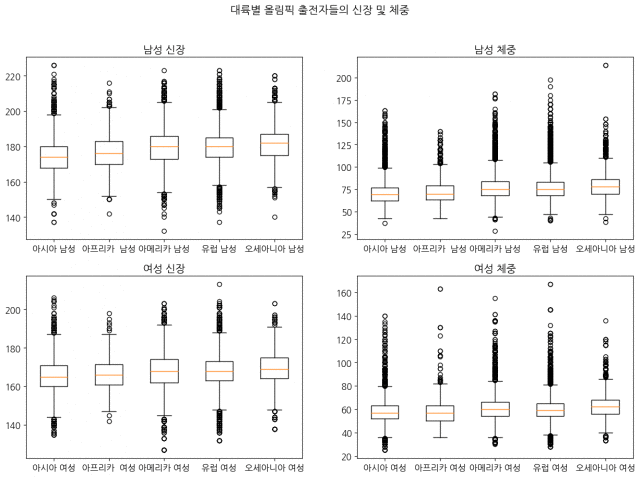

## 9. 연도별 정식 스포츠 종목 및 사라진 종목들

### 1) 정식종목 채택

- 개최국 종목 추천권
올림픽 개최국은 당 올림픽에 한해, 개최국 추천 종목 5개 내외를 정식 종목으로 채택할 수 있다. 당연히 개최국들은 자국에서 인기가 좋고, 자국이 메달을 획득하기 유리한 종목을 채택하려 할 것이고, 이는 올림픽 개최의 이점이 될 수 있다. 흥행에도 도움이 된다. 단, 이 자유 개최 종목들은 IOC가 개최비를 지원하지 않고 100% 자국 예산으로 충당해야 한다. 그리고 이런 종목들은 정식 종목으로 올림픽 기록에 반영되긴 해도, 이후 차기 대회에서 해당 종목의 경기를 실시해야 할 의무는 없다. 해당 규정은 2020 도쿄 올림픽부터 반영되어 2020 도쿄 올림픽에는 야구-소프트볼, 가라데, 스포츠 클라이밍, 서핑, 스케이트보드가 정식 종목으로 추가되었다. 규정이 공개된 직후 일본이 추천할 종목은 안 봐도 비디오 수준이라 야구가 12년 만에 올림픽에 임시로라도 복귀하는 것이 기정 사실로 받아들여질 정도였다.
예를 들어 2020 도쿄 올림픽에서는 일본의 최고 인기 스포츠이자, 2008 베이징 올림픽을 마지막으로 올림픽에서 퇴출된 상태인 야구가 추천 종목으로 추가되었는데, 이건 도쿄 대회에서만 한시적으로 추가되는 것이다. 그 다음 대회인 2024 파리 올림픽에서 야구 경기를 실시해야 할 의무는 없다. 그래서 야구는 정식 종목에서 빠졌다.
평창 동계올림픽에는 해당사항이 없는 사안이다. 원래는 IOC에서도 2018 동계올림픽 때 제한적으로 종목추천권을 인정하려는 검토를 했으나, 한국 내에서 개최비용 부담 때문에 논의가 흐지부지되고 무산되었다. 그리고 해당된다 한들, 쇼트트랙 내 세부종목 추가 말고는 딱히 한국이 추가할 만한 동계 종목이 떠오르지 않았던 것도 한 원인. 경북 청송에서 세계대회 개최하고 있는 아이스 클라이밍이 있지만 시범종목에도 넣지 않아서 아이스 클라이밍 선수들이 실망했다는 후문이 전해진다.
한국이 하계올림픽을 개최하고 추가종목을 넣는다면 야구[25], 당구, 볼링, e스포츠, 스포츠 클라이밍, 바둑, 소프트테니스 정도까지 포함될 가능성이 높다. 당구를 제외한 이들은 전부 아시안 게임 종목이라 명분도 있다. 물론 당구는 올림픽 진입 논의가 커서 추가종목으로 안 되고 바로 정식 종목이 될 가능성도 높지만.


__사라진 경기 종목들__

In [28]:
#사라진 종목들
disappear_sport[disappear_sport < 2008]


Sport
Basque Pelota          1900
Croquet                1900
Cricket                1900
Roque                  1904
Jeu De Paume           1908
Racquets               1908
Motorboating           1908
Lacrosse               1908
Tug-Of-War             1920
Rugby                  1924
Military Ski Patrol    1924
Polo                   1936
Aeronautics            1936
Alpinism               1936
Art Competitions       1948
Name: max, dtype: int64

In [29]:
df_host = pd.read_csv('olympic_hosts.csv')

__채택 된 종목들 (채택년도)__

In [30]:
#공식종목 채택년도
launch_sport[launch_sport >1936]


Sport
Biathlon                     1960
Luge                         1964
Volleyball                   1964
Judo                         1964
Table Tennis                 1988
Baseball                     1992
Short Track Speed Skating    1992
Badminton                    1992
Freestyle Skiing             1992
Beach Volleyball             1996
Snowboarding                 1998
Taekwondo                    2000
Trampolining                 2000
Triathlon                    2000
Rugby Sevens                 2016
Name: min, dtype: int64

In [33]:
#공식종목 채택년도
launch_sport[launch_sport >1936]


Sport
Biathlon                     1960
Luge                         1964
Volleyball                   1964
Judo                         1964
Table Tennis                 1988
Baseball                     1992
Short Track Speed Skating    1992
Badminton                    1992
Freestyle Skiing             1992
Beach Volleyball             1996
Snowboarding                 1998
Taekwondo                    2000
Trampolining                 2000
Triathlon                    2000
Rugby Sevens                 2016
Name: min, dtype: int64

## 4) 정식종목이 채택 된 회기의 개최국가는 해당 종목에서 우세할까?

- 미국, Biathlon, Squaw Valley 1960
- 오스트리아, Luge, Volleyball, Judo, Innsbruck 1964	
- 대한민국, Table Tennis, Seoul 1988
- 스페인, Baseball, Barcelona 1992	
- 프랑스, Short Track Speed Skating, Albertville 1992 등

In [34]:


team_medal_count[team_medal_count.Sport=='Biathlon'][ team_medal_count.Year==1960][team_medal_count.Team=='United States']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Team,Medal,Sport,Year,count
36342,United States,0,Biathlon,1960,4


In [35]:
team_medal_count[team_medal_count.Sport=='Luge'][ team_medal_count.Year==1964][team_medal_count.Team=='Austria']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Team,Medal,Sport,Year,count
2215,Austria,0,Luge,1964,6
1835,Austria,1,Luge,1964,1


In [36]:
team_medal_count[team_medal_count.Sport=='Volleyball'][team_medal_count.Year==1964][team_medal_count.Team=='Austria']
#출전 데이터 없음


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Team,Medal,Sport,Year,count


In [37]:
team_medal_count[team_medal_count.Sport=='Judo'][team_medal_count.Year==1964][team_medal_count.Team=='Austria']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Team,Medal,Sport,Year,count
2202,Austria,0,Judo,1964,3


In [38]:
team_medal_count[team_medal_count.Sport=='Table Tennis'][team_medal_count.Year==1988][team_medal_count.Team=='South Korea']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Team,Medal,Sport,Year,count
30778,South Korea,0,Table Tennis,1988,4
30447,South Korea,1,Table Tennis,1988,3
30897,South Korea,1,Table Tennis,1988,1


In [39]:
team_medal_count[team_medal_count.Sport=='Baseball'][team_medal_count.Year==1992][team_medal_count.Team=='Spain']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Team,Medal,Sport,Year,count
31788,Spain,0,Baseball,1992,20


In [40]:
team_medal_count[team_medal_count.Sport=='Short Track Speed Skating'][team_medal_count.Year==1992][team_medal_count.Team=='France']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Team,Medal,Sport,Year,count
12621,France,0,Short Track Speed Skating,1992,10


### ＊정식종목이 채택 된 회기의 개최국가는 해당 종목에서 우세할까?
→ 총 5개의 대회를 분석해 본 결과, 정식종목이 채택 된 회기의 개최국가에서는 해당 종목에서 우세하거나 그런 결과가 눈에 띄진 않는다.

__올림픽 주최국 Dataset Load__

In [41]:
df_host

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
1,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
2,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
3,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014
4,london-2012,2012-08-12T19:00:00Z,2012-07-27T07:00:00Z,Great Britain,London 2012,Summer,2012
5,vancouver-2010,2010-02-28T04:00:00Z,2010-02-12T16:00:00Z,Canada,Vancouver 2010,Winter,2010
6,beijing-2008,2008-08-24T12:00:00Z,2008-08-08T00:00:00Z,China,Beijing 2008,Summer,2008
7,turin-2006,2006-02-26T19:00:00Z,2006-02-10T07:00:00Z,Italy,Turin 2006,Winter,2006
8,athens-2004,2004-08-29T18:00:00Z,2004-08-13T06:00:00Z,Greece,Athens 2004,Summer,2004
9,salt-lake-city-2002,2002-02-24T08:00:00Z,2002-02-08T15:00:00Z,United States,Salt Lake City 2002,Winter,2002


In [42]:
df_host.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game_slug        52 non-null     object
 1   game_end_date    52 non-null     object
 2   game_start_date  52 non-null     object
 3   game_location    52 non-null     object
 4   game_name        52 non-null     object
 5   game_season      52 non-null     object
 6   game_year        52 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.0+ KB


## 6. 역대 올림픽 기간

 - 데이터 셋을 보면 초창기 올림픽 때와 현재의 올림픽의 기간은 다소 상이한 형태를 띄는 것을 확인 할 수 있다. 

In [43]:
df_host['game_end_date'] = pd.to_datetime(df_host['game_end_date'])
df_host['game_start_date'] = pd.to_datetime(df_host['game_start_date'])

In [44]:
df_host.info()
df_host

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   game_slug        52 non-null     object             
 1   game_end_date    52 non-null     datetime64[ns, UTC]
 2   game_start_date  52 non-null     datetime64[ns, UTC]
 3   game_location    52 non-null     object             
 4   game_name        52 non-null     object             
 5   game_season      52 non-null     object             
 6   game_year        52 non-null     int64              
dtypes: datetime64[ns, UTC](2), int64(1), object(4)
memory usage: 3.0+ KB


,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,tokyo-2020,2021-08-08 14:00:00+00:00,2021-07-23 11:00:00+00:00,Japan,Tokyo 2020,Summer,2020
1,pyeongchang-2018,2018-02-25 08:00:00+00:00,2018-02-08 23:00:00+00:00,Republic of Korea,PyeongChang 2018,Winter,2018
2,rio-2016,2016-08-21 21:00:00+00:00,2016-08-05 12:00:00+00:00,Brazil,Rio 2016,Summer,2016
3,sochi-2014,2014-02-23 16:00:00+00:00,2014-02-07 04:00:00+00:00,Russian Federation,Sochi 2014,Winter,2014
4,london-2012,2012-08-12 19:00:00+00:00,2012-07-27 07:00:00+00:00,Great Britain,London 2012,Summer,2012
5,vancouver-2010,2010-02-28 04:00:00+00:00,2010-02-12 16:00:00+00:00,Canada,Vancouver 2010,Winter,2010
6,beijing-2008,2008-08-24 12:00:00+00:00,2008-08-08 00:00:00+00:00,China,Beijing 2008,Summer,2008
7,turin-2006,2006-02-26 19:00:00+00:00,2006-02-10 07:00:00+00:00,Italy,Turin 2006,Winter,2006
8,athens-2004,2004-08-29 18:00:00+00:00,2004-08-13 06:00:00+00:00,Greece,Athens 2004,Summer,2004
9,salt-lake-city-2002,2002-02-24 08:00:00+00:00,2002-02-08 15:00:00+00:00,United States,Salt Lake City 2002,Winter,2002


In [45]:
df_host['game_period'] = df_host['game_end_date'] - df_host['game_start_date']
df_host.sort_values(by='game_period', ascending=False)

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year,game_period
48,london-1908,1908-10-31 20:09:00+00:00,1908-04-27 08:00:00+00:00,Great Britain,London 1908,Summer,1908,187 days 12:09:00
50,paris-1900,1900-10-28 19:50:39+00:00,1900-05-14 08:50:39+00:00,France,Paris 1900,Summer,1900,167 days 11:00:00
46,antwerp-1920,1920-09-12 19:00:00+00:00,1920-04-20 07:00:00+00:00,Belgium,Antwerp 1920,Summer,1920,145 days 12:00:00
49,st-louis-1904,1904-11-24 02:00:00+00:00,1904-07-01 14:00:00+00:00,United States,St. Louis 1904,Summer,1904,145 days 12:00:00
42,amsterdam-1928,1928-08-12 19:00:00+00:00,1928-05-17 07:00:00+00:00,Netherlands,Amsterdam 1928,Summer,1928,87 days 12:00:00
44,paris-1924,1924-07-27 19:00:00+00:00,1924-05-04 07:00:00+00:00,France,Paris 1924,Summer,1924,84 days 12:00:00
47,stockholm-1912,1912-07-27 20:00:00+00:00,1912-05-05 08:00:00+00:00,Sweden,Stockholm 1912,Summer,1912,83 days 12:00:00
30,rome-1960,1960-09-11 19:00:00+00:00,1960-08-25 07:00:00+00:00,Italy,Rome 1960,Summer,1960,17 days 12:00:00
12,atlanta-1996,1996-08-05 21:00:00+00:00,1996-07-19 12:00:00+00:00,United States,Atlanta 1996,Summer,1996,17 days 09:00:00
32,melbourne-1956,1956-12-08 10:00:00+00:00,1956-11-21 22:00:00+00:00,"Australia, Sweden",Melbourne 1956,Summer,1956,16 days 12:00:00


In [49]:
#timedelta 형식을 int형으로 변환
df_host['game_period'] = df_host['game_period'].dt.days

In [50]:
df_host.sort_values(by='game_period',ascending=False)


,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year,game_period
48,london-1908,1908-10-31 20:09:00+00:00,1908-04-27 08:00:00+00:00,Great Britain,London 1908,Summer,1908,187
50,paris-1900,1900-10-28 19:50:39+00:00,1900-05-14 08:50:39+00:00,France,Paris 1900,Summer,1900,167
46,antwerp-1920,1920-09-12 19:00:00+00:00,1920-04-20 07:00:00+00:00,Belgium,Antwerp 1920,Summer,1920,145
49,st-louis-1904,1904-11-24 02:00:00+00:00,1904-07-01 14:00:00+00:00,United States,St. Louis 1904,Summer,1904,145
42,amsterdam-1928,1928-08-12 19:00:00+00:00,1928-05-17 07:00:00+00:00,Netherlands,Amsterdam 1928,Summer,1928,87
44,paris-1924,1924-07-27 19:00:00+00:00,1924-05-04 07:00:00+00:00,France,Paris 1924,Summer,1924,84
47,stockholm-1912,1912-07-27 20:00:00+00:00,1912-05-05 08:00:00+00:00,Sweden,Stockholm 1912,Summer,1912,83
12,atlanta-1996,1996-08-05 21:00:00+00:00,1996-07-19 12:00:00+00:00,United States,Atlanta 1996,Summer,1996,17
30,rome-1960,1960-09-11 19:00:00+00:00,1960-08-25 07:00:00+00:00,Italy,Rome 1960,Summer,1960,17
24,munich-1972,1972-09-11 19:00:00+00:00,1972-08-26 07:00:00+00:00,Federal Republic of Germany,Munich 1972,Summer,1972,16


In [51]:
import matplotlib.pyplot as plt

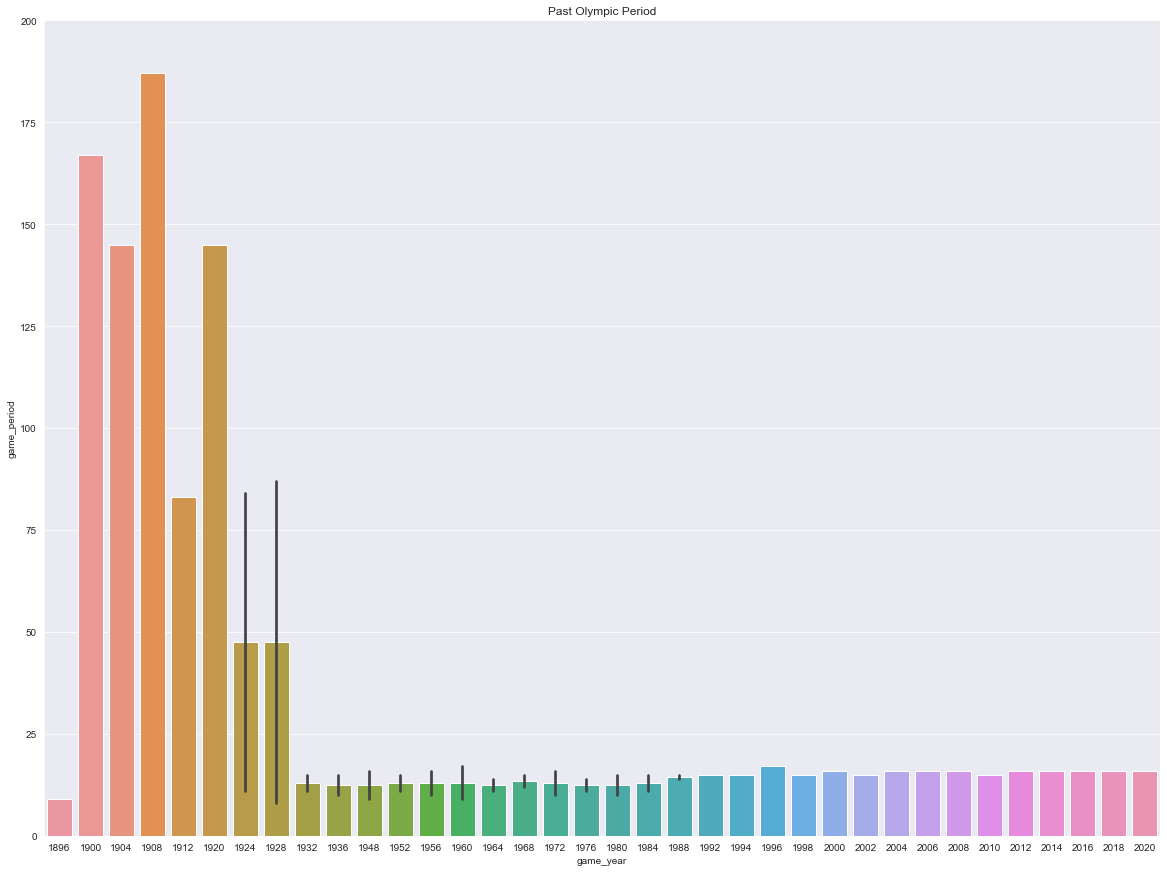

In [52]:
sns.set_style('darkgrid') 
plt.figure(figsize=(20,15))
plt.ylim(0,200)
plt.title('Past Olympic Period')
sns.barplot(data=df_host, y='game_period', x='game_year')


## 11. 역대 올림픽별 최대 메달 보유국 TOP 5

In [39]:
import pandas as pd
# 데이터 불러오기
df = pd.read_csv('athlete_events.csv')
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [40]:
len(df['City']), df['City'].isnull().sum()
# --> 전체건수, na건수

(271116, 0)

In [41]:
# 'Medal' 컬럼 결측치 제거 
df = df.dropna(subset = ['Medal']).reset_index(drop = True) 
df.drop_duplicates(inplace = True)
len(df['Medal']), df['Medal'].isnull().sum()

(39772, 0)

In [42]:
# 'Year', 'City', 'Team', 'Medal' 컬럼 기준으로 그룹화 후 'Medal_Count' 컬럼에 'Medal' 컬럼의 count 추가. 인덱스 리셋 
df_city = pd.DataFrame(df.groupby(['Year','City','Team', 'Medal']).agg(**{'Medal_Count':('Medal','count')})).reset_index()
df_city

,Year,City,Team,Medal,Medal_Count
0,1896,Athina,Australia,Gold,2
1,1896,Athina,Australia/Great Britain,Bronze,2
2,1896,Athina,Austria,Bronze,2
3,1896,Athina,Austria,Gold,2
4,1896,Athina,Austria,Silver,1
...,...,...,...,...,...
4300,2016,Rio de Janeiro,Uzbekistan,Silver,2
4301,2016,Rio de Janeiro,Venezuela,Bronze,2
4302,2016,Rio de Janeiro,Venezuela,Silver,1
4303,2016,Rio de Janeiro,Vietnam,Gold,1


In [43]:
# 'Year' 컬럼 데이터타입 변경 int -> str
df_city = df_city.astype({'Year':str})

In [44]:
df_city.info() # 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         4305 non-null   object
 1   City         4305 non-null   object
 2   Team         4305 non-null   object
 3   Medal        4305 non-null   object
 4   Medal_Count  4305 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 168.3+ KB


In [45]:
# 'Year', 'City' 컬럼 합쳐서 'Olympic_Name' 컬럼 생성
df_city['Olympic_Name'] = df_city['Year'] + '-' + df_city['City']
df_city

,Year,City,Team,Medal,Medal_Count,Olympic_Name
0,1896,Athina,Australia,Gold,2,1896-Athina
1,1896,Athina,Australia/Great Britain,Bronze,2,1896-Athina
2,1896,Athina,Austria,Bronze,2,1896-Athina
3,1896,Athina,Austria,Gold,2,1896-Athina
4,1896,Athina,Austria,Silver,1,1896-Athina
...,...,...,...,...,...,...
4300,2016,Rio de Janeiro,Uzbekistan,Silver,2,2016-Rio de Janeiro
4301,2016,Rio de Janeiro,Venezuela,Bronze,2,2016-Rio de Janeiro
4302,2016,Rio de Janeiro,Venezuela,Silver,1,2016-Rio de Janeiro
4303,2016,Rio de Janeiro,Vietnam,Gold,1,2016-Rio de Janeiro


In [46]:
df_city = df_city.drop(['Year','City'], axis = 1) # 필요없어진 'Year', 'City' 컬럼 삭제

In [57]:
df_city

,Team,Medal,Medal_Count,Olympic_Name
0,Australia,Gold,2,1896-Athina
1,Australia/Great Britain,Bronze,2,1896-Athina
2,Austria,Bronze,2,1896-Athina
3,Austria,Gold,2,1896-Athina
4,Austria,Silver,1,1896-Athina
...,...,...,...,...
4300,Uzbekistan,Silver,2,2016-Rio de Janeiro
4301,Venezuela,Bronze,2,2016-Rio de Janeiro
4302,Venezuela,Silver,1,2016-Rio de Janeiro
4303,Vietnam,Gold,1,2016-Rio de Janeiro


In [63]:
# 1896 아테네 올림픽  

# 'Olympic_Name' 컬럼에서 '1896-Athina' 문자를 포함하는 df_athina 생성
df_athina = df_city[df_city['Olympic_Name'].str.contains('1896-Athina')]
# df_athina 'Medal' 컬럼에서 동메달만 포함하는 df 로 변경
df_athina = df_athina[df_athina['Medal'].str.contains('Bronze')]
# 'Medal_Count' 컬럼 내림차순으로 정렬
df_athina = df_athina.sort_values(by = ['Medal_Count'], ascending=False)
# 1896 아테네 올림픽에서 동메달 획득 상위 10개 국가
df_athina = df_athina.head(10)

In [64]:
# 1988 서울 올림픽

df_seoul = df_city[df_city['Olympic_Name'].str.contains('1988-Seoul')]
df_seoul = df_seoul[df_seoul['Medal'].str.contains('Bronze')]
df_seoul = df_seoul.sort_values(by = ['Medal_Count'], ascending=False)
df_seoul = df_seoul.head(10)

In [66]:
# 2016 리우 올림픽

df_rio = df_city[df_city['Olympic_Name'].str.contains('2016-Rio de Janeiro')]
df_rio = df_rio[df_rio['Medal'].str.contains('Bronze')]
df_rio = df_rio.sort_values(by = ['Medal_Count'], ascending=False)
df_rio = df_rio.head(10)
df_rio

,Team,Medal,Medal_Count,Olympic_Name
4291,United States,Bronze,67,2016-Rio de Janeiro
4173,Germany,Bronze,67,2016-Rio de Janeiro
4131,Canada,Bronze,61,2016-Rio de Janeiro
4248,Russia,Bronze,35,2016-Rio de Janeiro
4134,China,Bronze,35,2016-Rio de Janeiro
4205,Japan,Bronze,34,2016-Rio de Janeiro
4177,Great Britain,Bronze,26,2016-Rio de Janeiro
4106,Australia,Bronze,25,2016-Rio de Janeiro
4198,Italy,Bronze,24,2016-Rio de Janeiro
4167,France,Bronze,21,2016-Rio de Janeiro


Text(0.5, 1.0, '2016 - Rio de Janeiro Olympic BronzeMedal Top 11 Country')

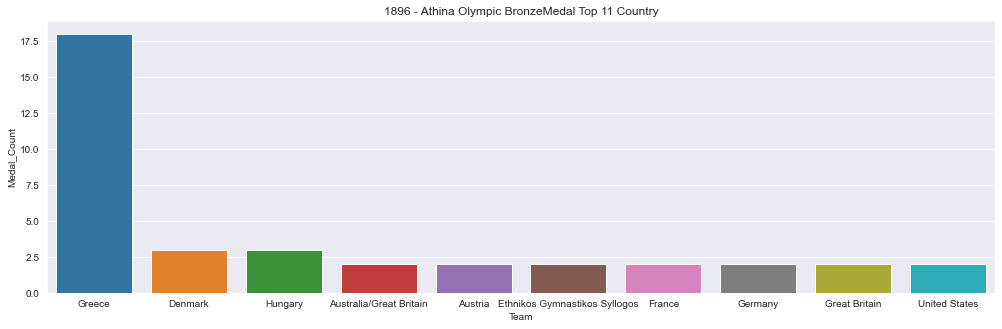

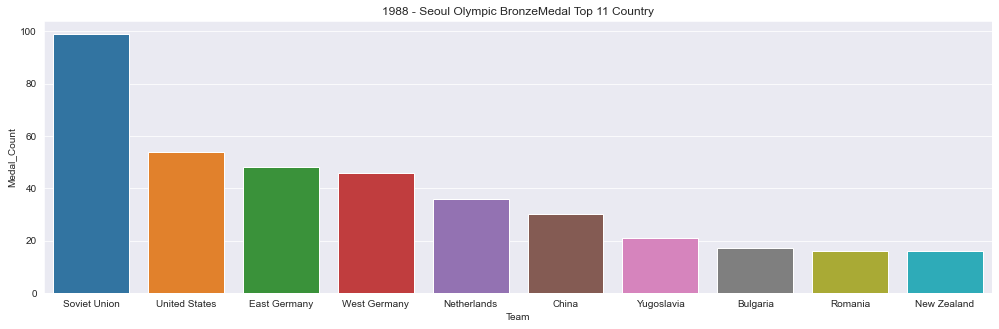

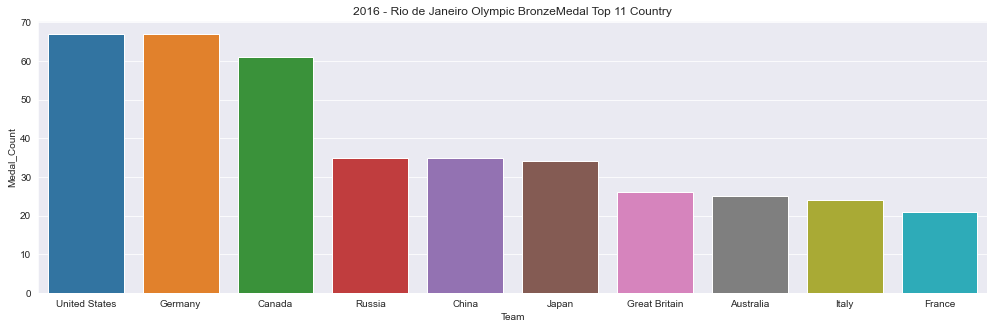

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1896 아테네 올림픽 동메달 획득 상위 10개 국가
fig = plt.figure(figsize = (17,5))
sns.barplot(x = 'Team', y = 'Medal_Count', data = df_athina)
plt.title('1896 - Athina Olympic BronzeMedal Top 11 Country')

# 1988 서울 올림픽 동메달 획득 상위 10개 국가
fig = plt.figure(figsize = (17,5))
sns.barplot(x = 'Team', y = 'Medal_Count', data = df_seoul)
plt.title('1988 - Seoul Olympic BronzeMedal Top 11 Country')

# 2016 리우 올림픽 동메달 획득 상위 10개 국가
fig = plt.figure(figsize = (17,5))
sns.barplot(x = 'Team', y = 'Medal_Count', data = df_rio)
plt.title('2016 - Rio de Janeiro Olympic BronzeMedal Top 11 Country')

## 12.각 올림픽당 동메달을 많이 딴 국가들의 top 10

In [1]:
### 국가별 금/은/동 메달 총 획득 개수 1896 ~ 2016

import pandas as pd
# 데이터 불러오기
df = pd.read_csv('athlete_events.csv')
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [2]:
# 데이터 구조 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [3]:
len(df['Medal']), df['Medal'].isnull().sum()
# --> 전체건수, na건수

(271116, 231333)

In [4]:
# 'Medal' 컬럼 결측치 제거 
country_medal = df.dropna(subset = ['Medal']).reset_index(drop = True) 
country_medal.drop_duplicates(inplace = True)
# 'Team', 'Medal' 컬럼 기준으로 그룹화 후 'Medal_Count' 컬럼에 'Medal' 컬럼의 count 추가. 인덱스 리셋 
country_medal = pd.DataFrame(country_medal.groupby(['Team', 'Medal']).agg(**{'Medal_Count':('Medal','count')})).reset_index()
country_medal

,Team,Medal,Medal_Count
0,A North American Team,Bronze,4
1,Afghanistan,Bronze,2
2,Algeria,Bronze,8
3,Algeria,Gold,5
4,Algeria,Silver,4
...,...,...,...
778,Zambia,Silver,1
779,Zimbabwe,Bronze,1
780,Zimbabwe,Gold,17
781,Zimbabwe,Silver,4


In [5]:
# merge()함수 : 두 데이터프레임을 각 데이터에 존재하는 고유값(key)을 기준으로 병합
# default 값 : pd.merge(df_left, df_right, how='inner', on=None)

# country_medal 데이터프레임 기준으로, 
# country_medal 데이터프레임의 'Team' 컬럼 기준으로 그룹화 
# -> 'Medal_Count' 컬럼의 sum 수치를 'Total_Medals' 컬럼으로 만든 데이터프레임 생성 -> 두 데이터프레임 merge 함수로 합치기
country_medal = pd.merge(country_medal, pd.DataFrame(country_medal.groupby('Team')['Medal_Count'].sum()).reset_index().rename(columns = {'Medal_Count':'Total_Medals'}), on = ['Team'], how = 'left')
country_medal = country_medal.sort_values(by = ['Total_Medals'], ascending=False)
country_medal.reset_index(drop = True, inplace = True)
country_medal

,Team,Medal,Medal_Count,Total_Medals
0,United States,Bronze,1233,5219
1,United States,Gold,2474,5219
2,United States,Silver,1512,5219
3,Soviet Union,Silver,716,2451
4,Soviet Union,Bronze,677,2451
...,...,...,...,...
778,Brynhild-2,Silver,1,1
779,Botswana,Silver,1,1
780,Kosovo,Gold,1,1
781,Bonaparte,Gold,1,1


In [6]:
# 엑셀파일로 저장
#country_medal.to_excel('medal.xlsx')

In [7]:
# 메달 총 획득 상위 11개 국가 
top_11 = country_medal.head(33)
top_11 = top_11.rename(columns={'Team':'Country'})
top_11

,Country,Medal,Medal_Count,Total_Medals
0,United States,Bronze,1233,5219
1,United States,Gold,2474,5219
2,United States,Silver,1512,5219
3,Soviet Union,Silver,716,2451
4,Soviet Union,Bronze,677,2451
5,Soviet Union,Gold,1058,2451
6,Germany,Gold,679,1984
7,Germany,Bronze,678,1984
8,Germany,Silver,627,1984
9,Great Britain,Silver,582,1673


Text(0.5, 1.0, 'Olympic Medals - Top 11')

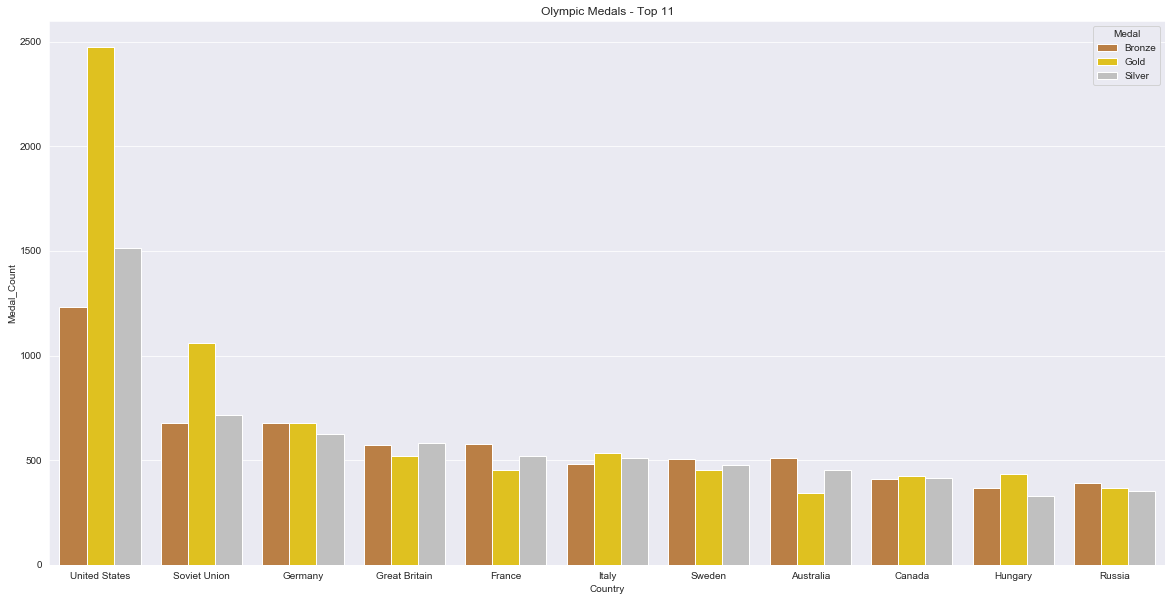

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.rc('font', family='Malgun Gothic')
#색상코드 #FFD700(gold), #C0C0C0(silver), #CD7F32(bronze) 
sns.set_style('darkgrid') # 스타일 설정
fig = plt.figure(figsize= (20,10))
sns.barplot(x = 'Country', y = 'Medal_Count', hue = 'Medal', data = top_11, palette=['#CD7F32', '#FFD700', '#C0C0C0'])
plt.title('Olympic Medals - Top 11')